In [1]:
# !unzip mmwave-data.zip

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import special as sp
from scipy.stats import gaussian_kde
from scipy.io import loadmat
from sklearn.neighbors import KernelDensity
from scipy import special as sp
import warnings
warnings.filterwarnings('ignore')

# Data Load

## Small Scale Fading Data 

In [3]:
def SSF_mmdata_dB(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def SSF_mmdata_linear(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9


######################
#### LOAD PATH AB ####
######################
SSF_pathAB_dB = pd.DataFrame()
SSF_pathAB_dB['AP1'], SSF_pathAB_dB['AP2'], SSF_pathAB_dB['AP3'],\
 SSF_pathAB_dB['AP4'], SSF_pathAB_dB['AP5'], SSF_pathAB_dB['AP6'],\
  SSF_pathAB_dB['AP7'], SSF_pathAB_dB['AP8'], SSF_pathAB_dB['AP9'] = SSF_mmdata_dB('AB')

SSF_pathAB_linear = pd.DataFrame()
SSF_pathAB_linear['AP1'], SSF_pathAB_linear['AP2'], SSF_pathAB_linear['AP3'],\
 SSF_pathAB_linear['AP4'], SSF_pathAB_linear['AP5'], SSF_pathAB_linear['AP6'],\
  SSF_pathAB_linear['AP7'], SSF_pathAB_linear['AP8'], SSF_pathAB_linear['AP9'] = SSF_mmdata_linear('AB')


######################
#### LOAD PATH BA ####
######################
SSF_pathBA_dB = pd.DataFrame()
SSF_pathBA_dB['AP1'], SSF_pathBA_dB['AP2'], SSF_pathBA_dB['AP3'],\
 SSF_pathBA_dB['AP4'], SSF_pathBA_dB['AP5'], SSF_pathBA_dB['AP6'],\
  SSF_pathBA_dB['AP7'], SSF_pathBA_dB['AP8'], SSF_pathBA_dB['AP9'] = SSF_mmdata_dB('BA')

SSF_pathBA_linear = pd.DataFrame()
SSF_pathBA_linear['AP1'], SSF_pathBA_linear['AP2'], SSF_pathBA_linear['AP3'],\
 SSF_pathBA_linear['AP4'], SSF_pathBA_linear['AP5'], SSF_pathBA_linear['AP6'],\
  SSF_pathBA_linear['AP7'], SSF_pathBA_linear['AP8'], SSF_pathBA_linear['AP9'] = SSF_mmdata_linear('BA')

##########################
#### PRINT STATISTICS ####
##########################
print('Path AB (dB) Statistics:')
display(SSF_pathAB_dB.describe())
print('Path AB (linear) Statistics:')
display(SSF_pathAB_linear.describe())
print('Path BA (dB) Statistics:')
display(SSF_pathBA_dB.describe())
print('Path BA (linear) Statistics:')
display(SSF_pathBA_linear.describe())


Path AB (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,-0.696300,-0.706977,-0.950157,-0.649444,-0.671172,-1.023778,-0.975409,-0.890574,-1.067207
std,3.827021,3.843941,4.345763,3.608783,3.657521,4.609185,4.428430,4.217900,4.628232
min,-28.257000,-26.160000,-30.613000,-26.990000,-29.916000,-29.998000,-27.744000,-24.949000,-26.882000
25%,-2.003200,-2.086100,-2.829525,-1.817875,-1.925500,-3.061450,-3.032250,-2.724975,-3.256600
50%,0.017756,-0.086271,-0.148310,-0.047697,-0.012861,-0.149310,-0.141100,-0.180765,-0.253520
75%,1.553000,1.488500,1.844975,1.316550,1.431450,1.974400,1.982550,1.821300,2.012050
max,8.209900,9.598300,9.200100,10.698000,9.334600,8.803300,9.140200,9.140100,9.516400


Path AB (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,0.998078,0.999170,0.994459,0.996652,0.996119,0.998034,0.996456,0.996790,0.996149
std,0.346952,0.361394,0.406651,0.340052,0.342458,0.428794,0.417400,0.402380,0.439500
min,0.038648,0.049204,0.029467,0.044717,0.031928,0.031630,0.041001,0.056568,0.045280
25%,0.794040,0.786490,0.721980,0.811160,0.801170,0.702955,0.705320,0.730723,0.687333
50%,1.002000,0.990120,0.983070,0.994525,0.998520,0.982960,0.983890,0.979400,0.971230
75%,1.195800,1.186900,1.236625,1.163675,1.179200,1.255200,1.256400,1.233275,1.260675
max,2.573300,3.019400,2.884100,3.426900,2.929100,2.755300,2.864200,2.864200,2.991000


Path BA (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,-1.141164,-1.154185,-1.201912,-1.197784,-1.120310,-1.244764,-1.132814,-1.108337,-1.219527
std,4.811502,4.821488,4.949272,4.950949,4.758712,5.050291,4.790806,4.782434,5.034982
min,-27.320000,-27.572000,-29.529000,-28.736000,-30.499000,-31.529000,-26.868000,-28.713000,-29.627000
25%,-3.625500,-3.761550,-3.749250,-3.664900,-3.414300,-3.908400,-3.468750,-3.467175,-3.835200
50%,-0.280440,-0.366350,-0.327530,-0.265050,-0.282530,-0.364120,-0.316615,-0.214105,-0.305010
75%,2.210025,2.240700,2.276500,2.249450,2.210200,2.357300,2.133950,2.137500,2.370900
max,10.524000,10.389000,10.315000,9.950700,9.385600,9.530000,10.148000,9.653300,10.109000


Path BA (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,0.997566,0.998390,0.998292,0.996041,0.994971,0.997650,0.996580,0.998705,0.999811
std,0.457868,0.468088,0.473801,0.460772,0.442697,0.477986,0.454135,0.453083,0.476423
min,0.043050,0.041821,0.033383,0.036578,0.029857,0.026520,0.045353,0.036673,0.033011
25%,0.658760,0.648515,0.649440,0.655775,0.674970,0.637650,0.670752,0.670878,0.643050
50%,0.968230,0.958700,0.962990,0.969950,0.968000,0.958950,0.964205,0.975650,0.965490
75%,1.289700,1.294300,1.299650,1.295600,1.289800,1.311800,1.278500,1.279025,1.313800
max,3.358700,3.307100,3.279200,3.144400,2.946300,2.995700,3.216800,3.038600,3.202300


## Composite (Small + Large) Scale Fading Data

In [4]:
def composite_mmdata_dB(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def composite_mmdata_linear(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

######################
#### LOAD PATH AB ####
######################
composite_pathAB_dB = pd.DataFrame()
composite_pathAB_dB['AP1'], composite_pathAB_dB['AP2'], composite_pathAB_dB['AP3'],\
 composite_pathAB_dB['AP4'], composite_pathAB_dB['AP5'], composite_pathAB_dB['AP6'],\
  composite_pathAB_dB['AP7'], composite_pathAB_dB['AP8'], composite_pathAB_dB['AP9'] = composite_mmdata_dB('AB')

composite_pathAB_linear = pd.DataFrame()
composite_pathAB_linear['AP1'], composite_pathAB_linear['AP2'], composite_pathAB_linear['AP3'],\
 composite_pathAB_linear['AP4'], composite_pathAB_linear['AP5'], composite_pathAB_linear['AP6'],\
  composite_pathAB_linear['AP7'], composite_pathAB_linear['AP8'], composite_pathAB_linear['AP9'] = composite_mmdata_linear('AB')


######################
#### LOAD PATH BA ####
######################
composite_pathBA_dB = pd.DataFrame()
composite_pathBA_dB['AP1'], composite_pathBA_dB['AP2'], composite_pathBA_dB['AP3'],\
 composite_pathBA_dB['AP4'], composite_pathBA_dB['AP5'], composite_pathBA_dB['AP6'],\
  composite_pathBA_dB['AP7'], composite_pathBA_dB['AP8'], composite_pathBA_dB['AP9'] = composite_mmdata_dB('BA')

composite_pathBA_linear = pd.DataFrame()
composite_pathBA_linear['AP1'], composite_pathBA_linear['AP2'], composite_pathBA_linear['AP3'],\
 composite_pathBA_linear['AP4'], composite_pathBA_linear['AP5'], composite_pathBA_linear['AP6'],\
  composite_pathBA_linear['AP7'], composite_pathBA_linear['AP8'], composite_pathBA_linear['AP9'] = composite_mmdata_linear('BA')

##########################
#### PRINT STATISTICS ####
##########################
print('Path AB (dB) Statistics:')
display(composite_pathAB_dB.describe())
print('Path AB (linear) Statistics:')
display(composite_pathAB_linear.describe())
print('Path BA (dB) Statistics:')
display(composite_pathBA_dB.describe())
print('Path BA (linear) Statistics:')
display(composite_pathBA_linear.describe())


Path AB (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,-1.331243,-2.026816,-2.148211,-1.354591,-1.358023,-1.965932,-1.867219,-2.455355,-2.377686
std,5.555703,5.295770,5.622319,5.555328,5.270987,6.592554,5.370040,4.979277,5.386154
min,-34.977000,-35.591000,-37.205000,-33.143000,-34.196000,-36.296000,-32.348000,-32.857000,-32.103000
25%,-4.141100,-4.725900,-5.285100,-4.408050,-4.099150,-5.727400,-4.738550,-4.891600,-5.360025
50%,-0.597460,-1.021800,-1.318900,-0.049510,-0.654870,-1.528100,-0.982990,-1.590450,-1.507750
75%,2.620200,1.610700,1.786325,2.748350,1.862300,2.231150,1.945700,0.924527,1.539700
max,12.562000,9.626500,10.084000,9.553500,11.060000,13.356000,11.339000,9.054900,8.569400


Path AB (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,1.016877,0.921460,0.932225,1.008525,1.005849,1.035511,0.946677,0.863832,0.893894
std,0.547200,0.453448,0.513528,0.503199,0.564291,0.775473,0.486083,0.408087,0.462476
min,0.017830,0.016613,0.013796,0.022022,0.019507,0.015317,0.024133,0.022760,0.024821
25%,0.620790,0.580370,0.544185,0.602000,0.623795,0.517165,0.579525,0.569400,0.539513
50%,0.933530,0.889020,0.859125,0.994320,0.927380,0.838670,0.893000,0.832675,0.840645
75%,1.352150,1.203700,1.228300,1.372175,1.239150,1.292900,1.251050,1.112300,1.193975
max,4.247100,3.029200,3.193200,3.003800,3.572700,4.653600,3.689400,2.836300,2.682100


Path BA (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,-1.478477,-1.796911,-1.697986,-1.304056,-1.382989,-1.228730,-1.269627,-1.546466,-1.263962
std,5.612589,5.461735,5.331014,5.664596,5.709885,5.531827,5.590528,6.177197,5.595894
min,-29.275000,-30.195000,-29.306000,-31.022000,-35.014000,-30.264000,-29.162000,-32.034000,-29.974000
25%,-4.688175,-4.909150,-4.600750,-4.491600,-4.574200,-4.335100,-4.386750,-5.096475,-4.449900
50%,-0.726485,-1.062800,-0.846180,-0.413770,-0.738970,-0.424370,-0.462455,-0.927085,-0.411740
75%,2.475750,2.116600,2.084900,2.743400,2.576700,2.746100,2.654150,2.612550,2.782800
max,13.313000,12.184000,11.274000,13.101000,11.902000,10.764000,12.810000,14.148000,13.559000


Path BA (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,1.010464,0.963914,0.964883,1.029932,1.026995,1.030575,1.030587,1.047470,1.031002
std,0.577506,0.527819,0.503657,0.570421,0.595472,0.556338,0.572540,0.705591,0.566503
min,0.034377,0.030919,0.034252,0.028112,0.017754,0.030675,0.034824,0.025021,0.031717
25%,0.582895,0.568255,0.588795,0.596235,0.590590,0.607080,0.603480,0.556130,0.599110
50%,0.919760,0.884830,0.907180,0.953480,0.918440,0.952320,0.948150,0.898760,0.953700
75%,1.329775,1.275950,1.271300,1.371450,1.345300,1.371800,1.357425,1.350900,1.377700
max,4.630500,4.066500,3.661900,4.518900,3.936400,3.453000,4.370200,5.098000,4.763800


# Auxiliary Methods

In [5]:
def tic():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print("Elapsed time is " + str(time.time() - startTime_for_tictoc) + " seconds.")
    else:
        print("Toc: start time not set") 

def KappaMuPDF(r, kappa, mu, omega):
  '''
  kappa-mu pdf.
  '''
  A = (2*mu * ((1 + kappa)**((mu+1)/2))) \
          /(np.sqrt(omega) * (kappa**((mu-1)/2)) * np.exp(mu * kappa))
  B = (r / np.sqrt(omega))**(mu)
  C = np.exp(-mu*(1+kappa) * (r/np.sqrt(omega))**2)
  D = sp.iv(mu-1, 2*mu * np.sqrt(kappa * (1+kappa)) * (r/np.sqrt(omega)))

  pdf = A * B * C * D
  return pdf

def AlphaMuPDF(r, alpha, mu, r_hat):
  '''
  alpha-mu pdf.
  '''
  A = (alpha * (mu**mu) * (r**((alpha * mu)-1))) / (sp.gamma(mu) * (r_hat**(alpha * mu)))
  B = np.exp( - mu * ((r**alpha) / (r_hat**alpha)))

  pdf = A * B 
  return pdf

def kldiv(pVec1, pVec2):
  '''
  Kullback-Leibler divergence.
  '''
  KL = np.sum(pVec1*(np.log2(pVec1)-np.log2(pVec2)))
  return KL

def RAD(kldiv1, kldiv2):
  '''
  Resistor-Average Distance.
  '''
  RAD = 1/(1/kldiv1+1/kldiv2)
  return RAD

def getDensityEstimationSamples(linear_data, nExtractedSamples, path, nAP):
  '''
  Extracted KDE uniformly spaced samples from the data.
  '''
  Xdata = np.linspace(linear_data.min(), linear_data.max(), nExtractedSamples).reshape(-1, 1)
  kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(linear_data.values.reshape(-1, 1))
  
  logkde = kde.score_samples(Xdata)
  Ydata = np.exp(logkde).reshape(-1,1)
  plt.figure(figsize=(10,7))
  plt.scatter(20*np.log10(Xdata), Ydata, c='magenta')
  plt.title(f'Path {path} | RX: {nAP}')
  plt.ylabel('Density')
  plt.xlabel('Small Scale Fading (dB)')
  plt.grid()
  plt.show()
  return Xdata, Ydata

def printSummary(path, nAP, fitnessType):
  print('='*30+'\n'+'Genetic Algorithm Fitting\nFitness Type: {}\nPath: {}\nRX: {}\n'.format(fitnessType, path, nAP))

In [6]:
def fitness_au(X, Y, fitnessType, alpha, mu, r_hat):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  (Alpha Mu)
  '''
  if fitnessType == 'MSE':
    y_pred = AlphaMuPDF(X, alpha, mu, r_hat)
    n = len(Y)
    cost = 1/n * np.sum(val**2 for val in (Y-y_pred))
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = AlphaMuPDF(X, alpha, mu, r_hat)/np.sum(AlphaMuPDF(X, alpha, mu, r_hat))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost


def geneticAlgorithm_au(X, Y):
  '''
  Genetic Algorithm incorporating Alpha Mu in the Fitness Function
  It fits alpha, mu, r_hat
  '''
  tic()
  solutions = []
  bestParams = []
  bestCriteria = 0
  bestGen = 0


  # Generate solutions (chromossomes)
  for s in range(nPopulation):
    solutions.append((random.uniform(0.01, 10), # alpha
                        random.uniform(0.01, 5), # mu
                        random.uniform(0.01, 2))) # r_hat

  # Evolutionary Loop
  for i in range(nMaxGen):
    rankedSolutions = []	
    for s in solutions:
      # if s[3] > 110: # Forcing Ms parameter to not get too high (avoiding overflow)
      #   s = list(s)
      #   s[3] = 105
      #   s = tuple(s)
      rankedSolutions.append( (fitness_au(X, Y, fitnessType, s[0],s[1],s[2]), s) )
    rankedSolutions.sort()
    rankedSolutions.reverse()
    
    # print(f'=== Generation: {i} === ')
    # print(f'Fitness: {rankedSolutions[0][0]}')
    # print('Best individual:')
    # print(f'Kappa: {rankedSolutions[0][1][0]}')
    # print(f'Mu: {rankedSolutions[0][1][1]}')
    # print(f'Omega: {rankedSolutions[0][1][2]}')
    # print(f'Ms {rankedSolutions[0][1][3]}\n')

    # Keeping track the best params and generation:
    if rankedSolutions[0][0] > bestCriteria:
      bestCriteria = rankedSolutions[0][0]
      bestGen = i
      bestParams = rankedSolutions[0][1]

    # Combine the best solutions and make a new solution of those combined solutions
    bestSolutions = rankedSolutions[:100]
    elements_alpha = []
    elements_mu = []
    elements_r_hat = [] 

    for s in bestSolutions:
      elements_alpha.append(s[1][0])
      elements_mu.append(s[1][1])
      elements_r_hat.append(s[1][2])


    newGen = []
    for _ in range(nPopulation):
      e1 = random.choice(elements_alpha) * random.uniform(0.975,1.025) # Mutation of 5%
      e2 = random.choice(elements_mu) * random.uniform(0.975,1.025) # Mutation of 5%
      e3 = random.choice(elements_r_hat) * random.uniform(0.975,1.025) # Mutation of 5%
      
      newGen.append((e1,e2,e3))

    solutions = newGen
    
    if i == nMaxGen-1:
      # print('='*10+'\n'+'Max number of generations exceeded!\n'+'='*10+'\n')
      # print()
      # print('='*10)
      print('Best Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
      print('Alpha: {}\nMu: {}\nR_hat: {}'.format(bestParams[0],bestParams[1],bestParams[2]))

      toc()
      return bestParams[0],bestParams[1],bestParams[2]

In [7]:
def fitness_ku(X, Y, fitnessType, kappa, mu, omega):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  (Kappa Mu)
  '''
  if fitnessType == 'MSE':
    y_pred = KappaMuPDF(X, kappa, mu, omega).astype(float)
    n = len(Y)
    sum = []
    for val in (Y-y_pred):
      sum.append(val**2)
    sum = np.sum(sum)
    cost = 1/n * sum
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = KappaMuPDF(X, kappa, mu, omega).astype(float)/np.sum(KappaMuPDF(X, kappa, mu, omega).astype(float))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost


def geneticAlgorithm_ku(X, Y):
  '''
  Genetic Algorithm incorporating Kappa Mu in the Fitness Function
  It fits kappa, mu, omega
  '''
  tic()
  solutions = []
  bestParams = []
  bestCriteria = 0
  bestGen = 0


  # Generate solutions (chromossomes)
  for s in range(nPopulation):
    solutions.append((random.uniform(0.1, 70), # kappa
                        random.uniform(0.01, 1.5), # mu
                        random.uniform(0.01, 2)))  # omega = r_hat^2
              
  # Evolutionary Loop
  for i in range(nMaxGen):
    rankedSolutions = []	
    for s in solutions:
      # if s[0] > 90: # Forcing Ms parameter to not get too high (avoiding overflow)
      #   s = list(s)
      #   s[0] = 90
      #   s = tuple(s)
      rankedSolutions.append( (fitness_ku(X, Y, fitnessType, s[0],s[1],s[2]), s) )
    rankedSolutions.sort()
    rankedSolutions.reverse()
    
    # print(f'=== Generation: {i} === ')
    # print(f'Fitness: {rankedSolutions[0][0]}')
    # print('Best individual:')
    # print(f'Kappa: {rankedSolutions[0][1][0]}')
    # print(f'Mu: {rankedSolutions[0][1][1]}')
    # print(f'Omega: {rankedSolutions[0][1][2]}\n')

    # Keeping track the best params and generation:
    if rankedSolutions[0][0] > bestCriteria:
      bestCriteria = rankedSolutions[0][0]
      bestGen = i
      bestParams = rankedSolutions[0][1]

    # Combine the best solutions and make a new solution of those combined solutions
    bestSolutions = rankedSolutions[:100]
    elements_kappa = []
    elements_mu = []
    elements_omega = [] 

    for s in bestSolutions:
      elements_kappa.append(s[1][0])
      elements_mu.append(s[1][1])
      elements_omega.append(s[1][2])


    newGen = []
    for _ in range(nPopulation):
      e1 = random.choice(elements_kappa) * random.uniform(0.975,1.025) # Mutation of 5%
      e2 = random.choice(elements_mu) * random.uniform(0.975,1.025) # Mutation of 5%
      e3 = random.choice(elements_omega) * random.uniform(0.975,1.025) # Mutation of 5%

      
      newGen.append((e1,e2,e3))

    solutions = newGen
    
    if i == nMaxGen-1:
      # print('='*10+'\n'+'Max number of generations exceeded!\n'+'='*10+'\n')
      # print()
      # print('='*10)
      print('Best Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
      print('Kappa: {}\nMu: {}\nOmega: {}'.format(bestParams[0],bestParams[1],bestParams[2]))
    
      toc()
      return bestParams[0],bestParams[1],bestParams[2]

# Small Scale Fading Fitting (PARAMETERS)

In [8]:
### PARAMETERS
nMaxGen = 200
nPopulation = 1000
nExtractedSamples = 81

## $\alpha$-$\mu$ and $\kappa$-$\mu$ - Path: AB



In [9]:
path = 'AB'

### AP 1

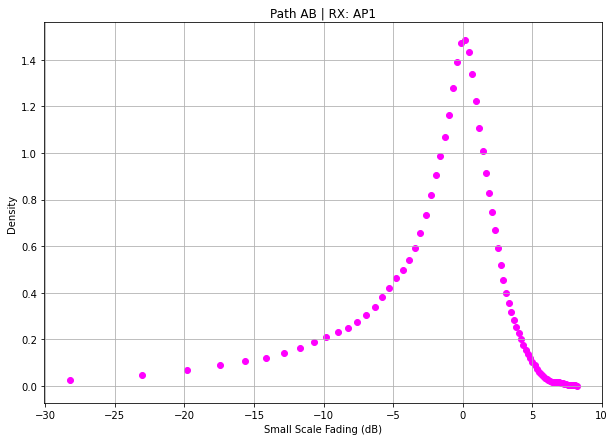

In [10]:
nAP = 'AP1'
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [11]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata)
(169, 75)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP1

Best Fitness: 169.87293546970528
Best Gen: 2
Kappa: 67.80555778222698
Mu: 0.08623621144919152
Omega: 1.0879567768360792
Elapsed time is 47.590513467788696 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP1

Best Fitness: 74.545997832473
Best Gen: 135
Kappa: 13.200352749136714
Mu: 0.3311720909577812
Omega: 1.1086563624575083
Elapsed time is 59.081568002700806 seconds.


(169, 75)

In [12]:
print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata)

============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP1

Best Fitness: [138.83248091]
Best Gen: 196
Alpha: 3.705742102649784
Mu: 1.0095147170603964
R_hat: 1.0999635497340554
Elapsed time is 38.46899962425232 seconds.


In [13]:
fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata)
(138, 13)

Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP1

Best Fitness: 31.120433812263943
Best Gen: 9
Alpha: 2.3604391924616497
Mu: 1.6165630999985905
R_hat: 1.0295948197235205
Elapsed time is 20.776397466659546 seconds.


(138, 13)

#### Plots

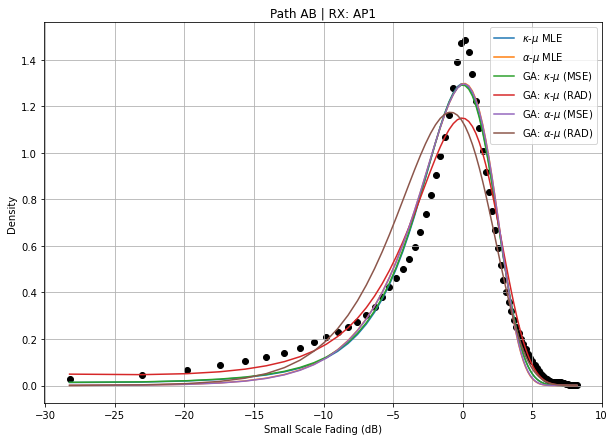

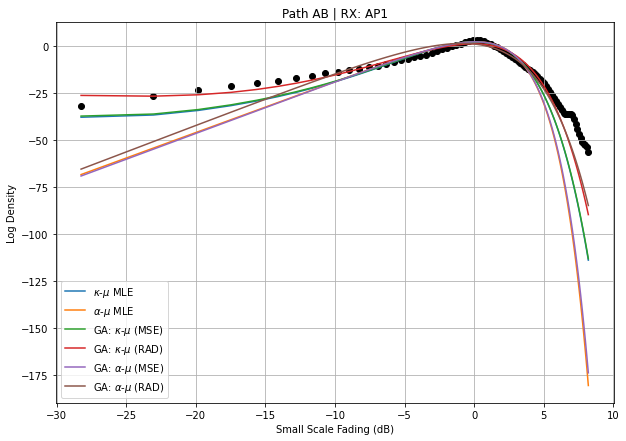

In [14]:
mle_ku_pathAB_ap1 = [70, 0.084599, 1.0912] # KappaMu MLE
mle_au_pathAB_ap1 = [3.7795, 0.98044, 1.101] # AlphaMu MLE
ku_AB_ap1_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap1[0], mle_ku_pathAB_ap1[1], mle_ku_pathAB_ap1[2]).astype(float)
au_AB_ap1_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap1[0], mle_au_pathAB_ap1[1], mle_au_pathAB_ap1[2]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), ku_AB_ap1_pdf, label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), au_AB_ap1_pdf, label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(ku_AB_ap1_pdf), label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(au_AB_ap1_pdf), label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse)), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad)), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse)), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad)), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [15]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

# AIC MLE - KAPPA MU
sum = np.sum(np.log(KappaMuPDF(data, mle_ku_pathAB_ap1[0], mle_ku_pathAB_ap1[1], mle_ku_pathAB_ap1[2]).astype(float)))
AIC_mle_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC MLE - ALPHA MU
sum = np.sum(np.log(AlphaMuPDF(data, mle_au_pathAB_ap1[0], mle_au_pathAB_ap1[1], mle_au_pathAB_ap1[2]).astype(float)))
AIC_mle_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_mse, ku_mu_mse, ku_omega_mse)))
AIC_ga_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_rad, ku_mu_rad, ku_omega_rad)))
AIC_ga_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: MSE
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_mse, au_mu_mse, au_r_hat_mse)))
AIC_ga_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: RAD
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_rad, au_mu_rad, au_r_hat_rad)))
AIC_ga_alpha_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

rads = {'Methods':['MLE - KappaMu', 'MLE - AlphaMu', \
                   'GA - KappaMu (Fitness = MSE)', 'GA - KappaMu (Fitness = RAD)',\
                   'GA - AlphaMu (Fitness = MSE)', 'GA - AlphaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_kappa_mu, AIC_mle_alpha_mu, AIC_ga_kappa_mu, AIC_ga_kappa_mu_rad, AIC_ga_alpha_mu , AIC_ga_alpha_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),15403.496733
1,GA - KappaMu (Fitness = MSE),16098.709554
2,MLE - KappaMu,16148.949489
3,GA - AlphaMu (Fitness = RAD),16453.574893
4,GA - AlphaMu (Fitness = MSE),17740.434760
5,MLE - AlphaMu,17848.315733


### AP 2

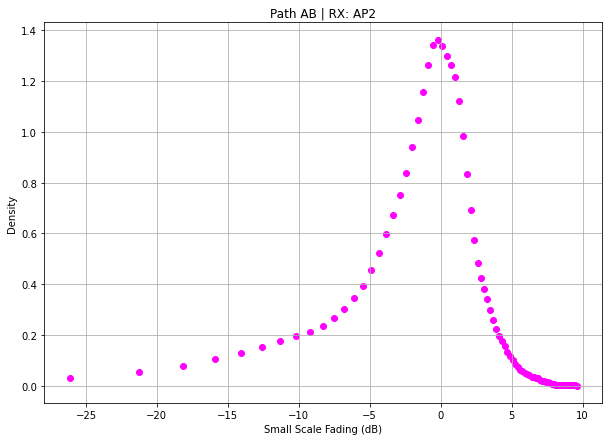

In [16]:
nAP = 'AP2'
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [17]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata)
(268, 49)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata)
(205, 13)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP2

Best Fitness: 268.26555040550807
Best Gen: 8
Kappa: 40.564698679540946
Mu: 0.13846013551162917
Omega: 1.0632990864036234
Elapsed time is 47.17195010185242 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP2

Best Fitness: 50.325729507180604
Best Gen: 179
Kappa: 4.593126545392919
Mu: 0.7462359187023426
Omega: 1.110389763103973
Elapsed time is 41.55179524421692 seconds.
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP2

Best Fitness: [205.71093639]
Best Gen: 149
Alpha: 3.593500930623358
Mu: 1.0363319424484563
R_hat: 1.0858586829708017
Elapsed time is 38.49297475814819 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP2

Best Fitness: 22.567326921887208
Best Gen: 4
Alpha: 2.605196242454488
Mu: 1.4439489578196218
R_hat: 1.1688195875832845
Elap

(205, 13)

#### Plots

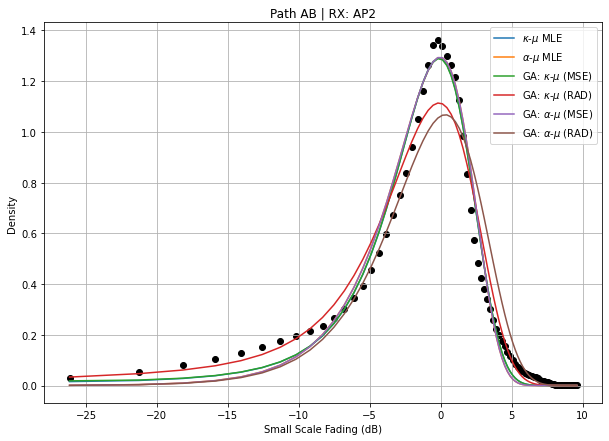

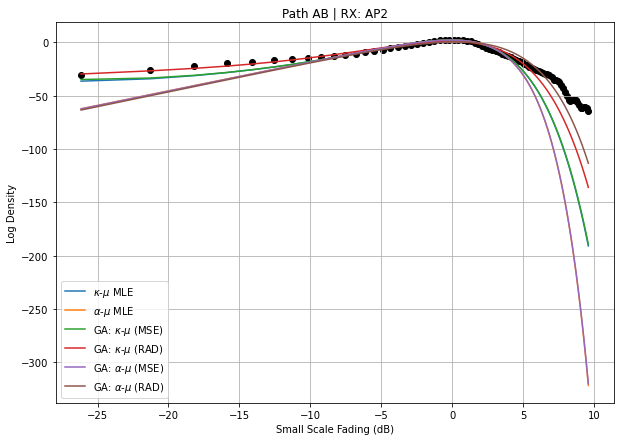

In [18]:
mle_ku_pathAB_ap2 = [70, 0.081811, 1.0624] # KappaMu MLE
mle_au_pathAB_ap2 = [3.6024, 1.0318, 1.086] # AlphaMu MLE
ku_AB_ap2_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap2[0], mle_ku_pathAB_ap2[1], mle_ku_pathAB_ap2[2]).astype(float)
au_AB_ap2_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap2[0], mle_au_pathAB_ap2[1], mle_au_pathAB_ap2[2]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), ku_AB_ap2_pdf, label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), au_AB_ap2_pdf, label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(ku_AB_ap2_pdf), label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(au_AB_ap2_pdf), label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse)), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad)), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse)), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad)), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [19]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

# AIC MLE - KAPPA MU
sum = np.sum(np.log(KappaMuPDF(data, mle_ku_pathAB_ap2[0], mle_ku_pathAB_ap2[1], mle_ku_pathAB_ap2[2]).astype(float)))
AIC_mle_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC MLE - ALPHA MU
sum = np.sum(np.log(AlphaMuPDF(data, mle_au_pathAB_ap2[0], mle_au_pathAB_ap2[1], mle_au_pathAB_ap2[2]).astype(float)))
AIC_mle_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_mse, ku_mu_mse, ku_omega_mse)))
AIC_ga_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_rad, ku_mu_rad, ku_omega_rad)))
AIC_ga_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: MSE
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_mse, au_mu_mse, au_r_hat_mse)))
AIC_ga_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: RAD
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_rad, au_mu_rad, au_r_hat_rad)))
AIC_ga_alpha_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

rads = {'Methods':['MLE - KappaMu', 'MLE - AlphaMu', \
                   'GA - KappaMu (Fitness = MSE)', 'GA - KappaMu (Fitness = RAD)',\
                   'GA - AlphaMu (Fitness = MSE)', 'GA - AlphaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_kappa_mu, AIC_mle_alpha_mu, AIC_ga_kappa_mu, AIC_ga_kappa_mu_rad, AIC_ga_alpha_mu , AIC_ga_alpha_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),14019.734422
1,GA - AlphaMu (Fitness = RAD),15168.178981
2,GA - KappaMu (Fitness = MSE),15198.820156
3,MLE - KappaMu,15258.903614
4,GA - AlphaMu (Fitness = MSE),17246.667725
5,MLE - AlphaMu,17261.580975


### AP 3

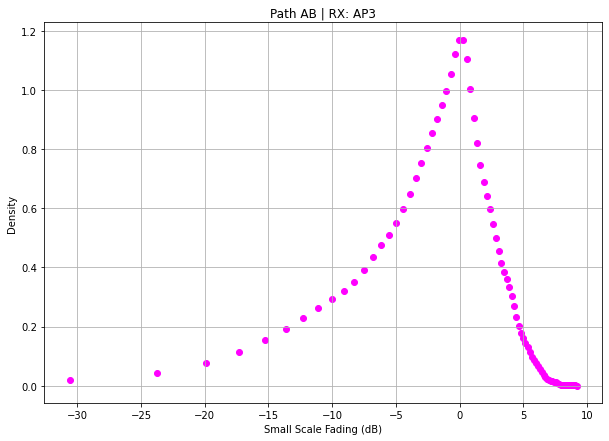

In [20]:
nAP = 'AP3'
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [21]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata)
(382, 179)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata)
(291, 68)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP3

Best Fitness: 389.11961293315176
Best Gen: 182
Kappa: 3.9214965860328315
Mu: 0.7024232348155276
Omega: 1.095855165331997
Elapsed time is 47.46864080429077 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP3

Best Fitness: 95.08290988900731
Best Gen: 1
Kappa: 2.4462880911720943
Mu: 0.8235427313348191
Omega: 1.0640777641512895
Elapsed time is 50.13886737823486 seconds.
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP3

Best Fitness: [291.45510127]
Best Gen: 91
Alpha: 2.9705355800406017
Mu: 0.9302380714238377
R_hat: 1.1139342605173503
Elapsed time is 38.62283802032471 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP3

Best Fitness: 5.827731133795602
Best Gen: 22
Alpha: 1.60853185277199
Mu: 3.832356697790095
R_hat: 0.8747037957893864
Elapsed

(291, 68)

#### Plots

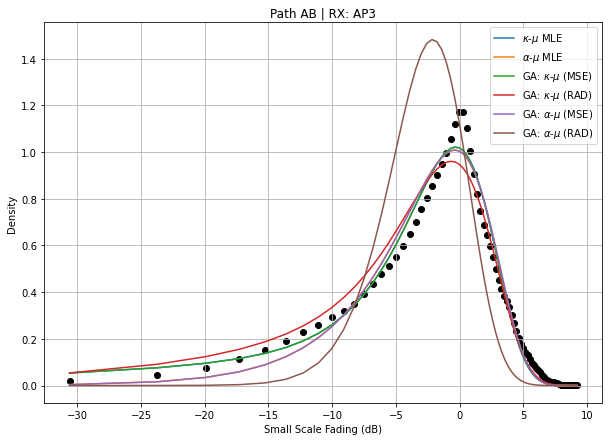

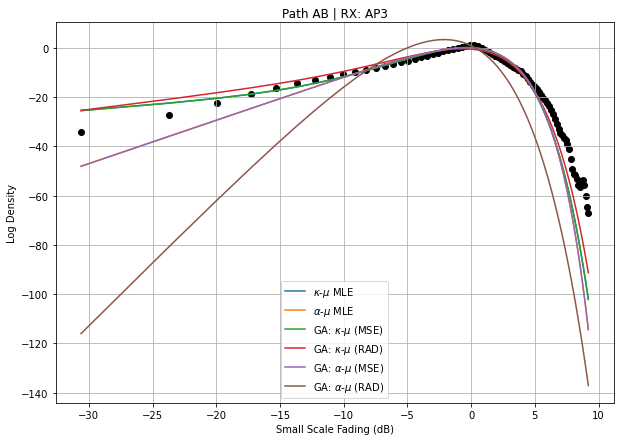

In [22]:
mle_ku_pathAB_ap3 = [3.9358, 0.70033, 1.0958] # KappaMu MLE
mle_au_pathAB_ap3 = [2.9752, 0.92743, 1.114] # AlphaMu MLE
ku_AB_ap3_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap3[0], mle_ku_pathAB_ap3[1], mle_ku_pathAB_ap3[2]).astype(float)
au_AB_ap3_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap3[0], mle_au_pathAB_ap3[1], mle_au_pathAB_ap3[2]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), ku_AB_ap3_pdf, label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), au_AB_ap3_pdf, label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(ku_AB_ap3_pdf), label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(au_AB_ap3_pdf), label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse)), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad)), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse)), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad)), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [23]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

# AIC MLE - KAPPA MU
sum = np.sum(np.log(KappaMuPDF(data, mle_ku_pathAB_ap3[0], mle_ku_pathAB_ap3[1], mle_ku_pathAB_ap3[2]).astype(float)))
AIC_mle_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC MLE - ALPHA MU
sum = np.sum(np.log(AlphaMuPDF(data, mle_au_pathAB_ap3[0], mle_au_pathAB_ap3[1], mle_au_pathAB_ap3[2]).astype(float)))
AIC_mle_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_mse, ku_mu_mse, ku_omega_mse)))
AIC_ga_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_rad, ku_mu_rad, ku_omega_rad)))
AIC_ga_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: MSE
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_mse, au_mu_mse, au_r_hat_mse)))
AIC_ga_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: RAD
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_rad, au_mu_rad, au_r_hat_rad)))
AIC_ga_alpha_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

rads = {'Methods':['MLE - KappaMu', 'MLE - AlphaMu', \
                   'GA - KappaMu (Fitness = MSE)', 'GA - KappaMu (Fitness = RAD)',\
                   'GA - AlphaMu (Fitness = MSE)', 'GA - AlphaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_kappa_mu, AIC_mle_alpha_mu, AIC_ga_kappa_mu, AIC_ga_kappa_mu_rad, AIC_ga_alpha_mu , AIC_ga_alpha_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),21923.809998
1,GA - KappaMu (Fitness = MSE),21949.280518
2,MLE - KappaMu,21949.749742
3,GA - AlphaMu (Fitness = MSE),22081.127855
4,MLE - AlphaMu,22082.124659
5,GA - AlphaMu (Fitness = RAD),34077.216573


### AP 4

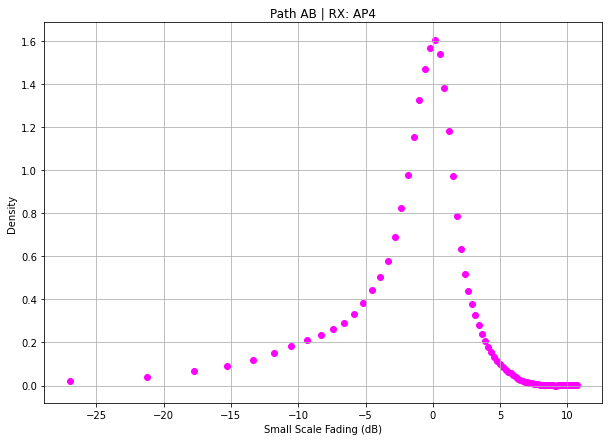

In [24]:
nAP = 'AP4'
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [25]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata)
(138, 33)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata)
(121, 22)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP4

Best Fitness: 138.82152793227627
Best Gen: 197
Kappa: 72.08526371088267
Mu: 0.09953791272667978
Omega: 1.0502306893550333
Elapsed time is 52.175748348236084 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP4

Best Fitness: 33.848857218189394
Best Gen: 14
Kappa: 10.596139187098965
Mu: 0.4300886345727311
Omega: 1.0833031272751623
Elapsed time is 56.15960335731506 seconds.
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP4

Best Fitness: [120.50107567]
Best Gen: 185
Alpha: 3.4773759059643417
Mu: 1.3375209462251483
R_hat: 1.0676291404209923
Elapsed time is 43.85539937019348 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP4

Best Fitness: 8.383637864038796
Best Gen: 28
Alpha: 1.023296979044912
Mu: 4.641550888440835
R_hat: 1.1100987178204975
E

(121, 22)

#### Plots

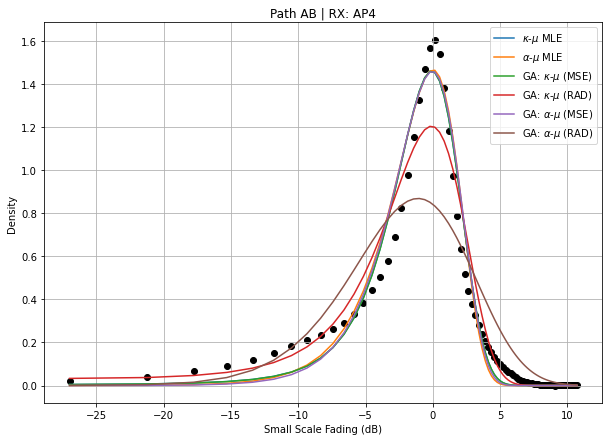

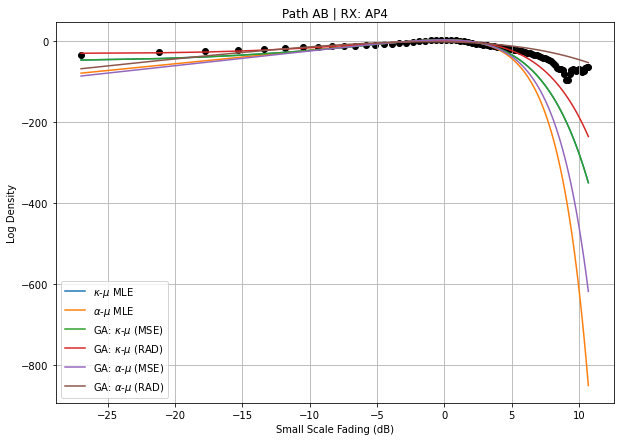

In [26]:
mle_ku_pathAB_ap4 = [70, 0.1023, 1.0499] # KappaMu MLE
mle_au_pathAB_ap4 = [3.896, 1.1092, 1.0701] # AlphaMu MLE
ku_AB_ap4_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap4[0], mle_ku_pathAB_ap4[1], mle_ku_pathAB_ap4[2]).astype(float)
au_AB_ap4_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap4[0], mle_au_pathAB_ap4[1], mle_au_pathAB_ap4[2]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), ku_AB_ap4_pdf, label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), au_AB_ap4_pdf, label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(ku_AB_ap4_pdf), label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(au_AB_ap4_pdf), label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse)), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad)), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse)), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad)), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [27]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

# AIC MLE - KAPPA MU
sum = np.sum(np.log(KappaMuPDF(data, mle_ku_pathAB_ap4[0], mle_ku_pathAB_ap4[1], mle_ku_pathAB_ap4[2]).astype(float)))
AIC_mle_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC MLE - ALPHA MU
sum = np.sum(np.log(AlphaMuPDF(data, mle_au_pathAB_ap4[0], mle_au_pathAB_ap4[1], mle_au_pathAB_ap4[2]).astype(float)))
AIC_mle_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_mse, ku_mu_mse, ku_omega_mse)))
AIC_ga_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_rad, ku_mu_rad, ku_omega_rad)))
AIC_ga_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: MSE
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_mse, au_mu_mse, au_r_hat_mse)))
AIC_ga_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: RAD
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_rad, au_mu_rad, au_r_hat_rad)))
AIC_ga_alpha_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

rads = {'Methods':['MLE - KappaMu', 'MLE - AlphaMu', \
                   'GA - KappaMu (Fitness = MSE)', 'GA - KappaMu (Fitness = RAD)',\
                   'GA - AlphaMu (Fitness = MSE)', 'GA - AlphaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_kappa_mu, AIC_mle_alpha_mu, AIC_ga_kappa_mu, AIC_ga_kappa_mu_rad, AIC_ga_alpha_mu , AIC_ga_alpha_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),13536.102710
1,MLE - KappaMu,15783.636475
2,GA - KappaMu (Fitness = MSE),15794.877803
3,GA - AlphaMu (Fitness = RAD),17635.501997
4,GA - AlphaMu (Fitness = MSE),18336.077396
5,MLE - AlphaMu,19687.131702


### AP 5

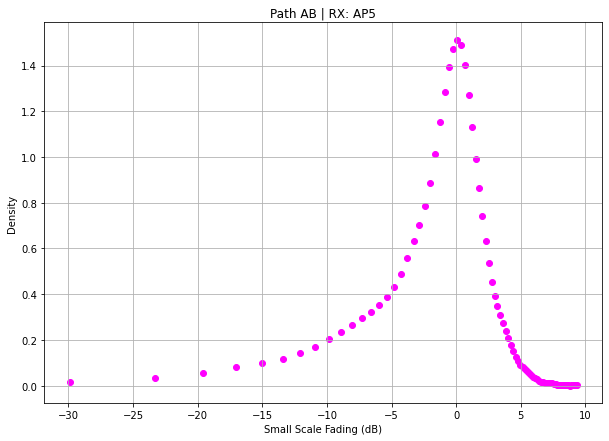

In [28]:
nAP = 'AP5'
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [29]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata)
(167, 51)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata)
(142, 20)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP5

Best Fitness: 167.00362429500979
Best Gen: 190
Kappa: 34.72416625197971
Mu: 0.18101168903154788
Omega: 1.0725159115049332
Elapsed time is 51.219210386276245 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP5

Best Fitness: 50.245699264558546
Best Gen: 199
Kappa: 10.611208622941248
Mu: 0.4188293631040995
Omega: 1.0977588554241664
Elapsed time is 43.64661717414856 seconds.
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP5

Best Fitness: [142.6926063]
Best Gen: 162
Alpha: 4.0604380216258145
Mu: 0.9403964378304546
R_hat: 1.0886894289411277
Elapsed time is 44.847365856170654 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP5

Best Fitness: 25.562906323457945
Best Gen: 24
Alpha: 1.4818400274055132
Mu: 3.9515439327042947
R_hat: 1.03741831781357

(142, 20)

#### Plots

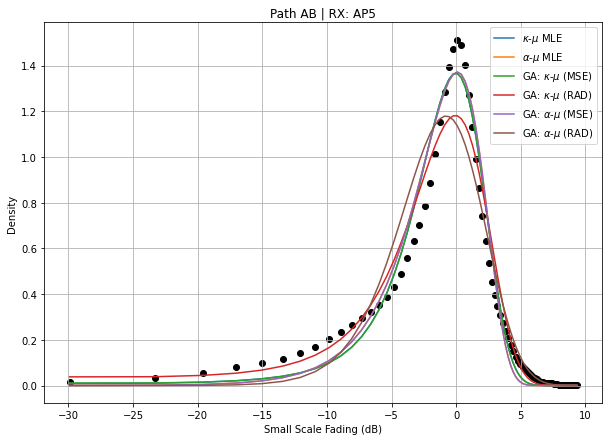

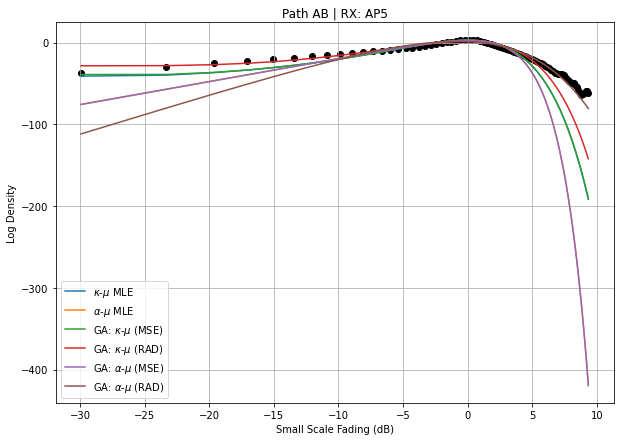

In [30]:
mle_ku_pathAB_ap5 = [70, 0.091737, 1.0713] # KappaMu MLE
mle_au_pathAB_ap5 = [4.0603, 0.93926, 1.0889] # AlphaMu MLE
ku_AB_ap5_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap5[0], mle_ku_pathAB_ap5[1], mle_ku_pathAB_ap5[2]).astype(float)
au_AB_ap5_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap5[0], mle_au_pathAB_ap5[1], mle_au_pathAB_ap5[2]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), ku_AB_ap5_pdf, label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), au_AB_ap5_pdf, label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(ku_AB_ap5_pdf), label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(au_AB_ap5_pdf), label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse)), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad)), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse)), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad)), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [31]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

# AIC MLE - KAPPA MU
sum = np.sum(np.log(KappaMuPDF(data, mle_ku_pathAB_ap5[0], mle_ku_pathAB_ap5[1], mle_ku_pathAB_ap5[2]).astype(float)))
AIC_mle_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC MLE - ALPHA MU
sum = np.sum(np.log(AlphaMuPDF(data, mle_au_pathAB_ap5[0], mle_au_pathAB_ap5[1], mle_au_pathAB_ap5[2]).astype(float)))
AIC_mle_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_mse, ku_mu_mse, ku_omega_mse)))
AIC_ga_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_rad, ku_mu_rad, ku_omega_rad)))
AIC_ga_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: MSE
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_mse, au_mu_mse, au_r_hat_mse)))
AIC_ga_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: RAD
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_rad, au_mu_rad, au_r_hat_rad)))
AIC_ga_alpha_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

rads = {'Methods':['MLE - KappaMu', 'MLE - AlphaMu', \
                   'GA - KappaMu (Fitness = MSE)', 'GA - KappaMu (Fitness = RAD)',\
                   'GA - AlphaMu (Fitness = MSE)', 'GA - AlphaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_kappa_mu, AIC_mle_alpha_mu, AIC_ga_kappa_mu, AIC_ga_kappa_mu_rad, AIC_ga_alpha_mu , AIC_ga_alpha_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),13043.785310
1,GA - KappaMu (Fitness = MSE),14134.613518
2,MLE - KappaMu,14161.015393
3,GA - AlphaMu (Fitness = RAD),14222.071106
4,MLE - AlphaMu,16989.950902
5,GA - AlphaMu (Fitness = MSE),17013.362258


### AP 6

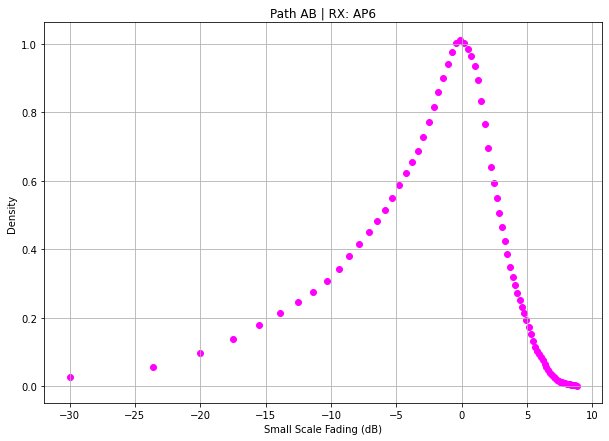

In [32]:
nAP = 'AP6'
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [33]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata)
(776)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP6

Best Fitness: 776.1180460673821
Best Gen: 118
Kappa: 2.9765269228890348
Mu: 0.7563115566419517
Omega: 1.1292823867555737
Elapsed time is 52.15077471733093 seconds.


776

In [34]:
fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata)
(276)

Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP6

Best Fitness: 276.2968380924053
Best Gen: 169
Kappa: 1.5093997452707042
Mu: 1.0008659479489923
Omega: 1.1805100838034603
Elapsed time is 46.73640298843384 seconds.


276

In [35]:
print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata)
(505)

============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP6

Best Fitness: [505.89463653]
Best Gen: 165
Alpha: 3.1734324550358104
Mu: 0.7510257767264278
R_hat: 1.141164894770707
Elapsed time is 44.20103979110718 seconds.


505

In [36]:
fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata)
(144)

Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP6

Best Fitness: 75.70859679919354
Best Gen: 154
Alpha: 1.7523709211004226
Mu: 1.8120943285044404
R_hat: 1.1071213820855508
Elapsed time is 24.43159532546997 seconds.


144

#### Plots

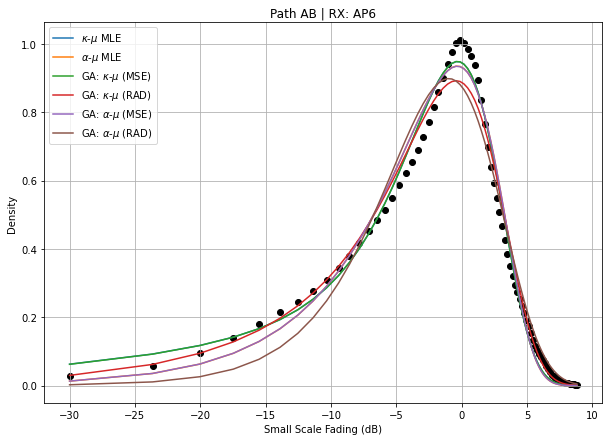

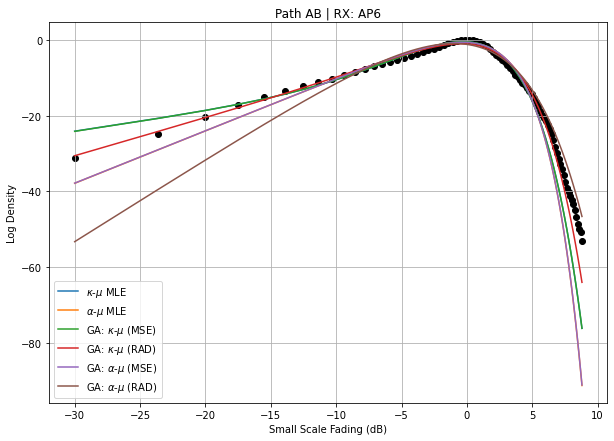

In [37]:
mle_ku_pathAB_ap6 = [2.9856, 0.75482, 1.1294] # KappaMu MLE
mle_au_pathAB_ap6 = [3.1744, 0.75118, 1.141] # AlphaMu MLE
ku_AB_ap6_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap6[0], mle_ku_pathAB_ap6[1], mle_ku_pathAB_ap6[2]).astype(float)
au_AB_ap6_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap6[0], mle_au_pathAB_ap6[1], mle_au_pathAB_ap6[2]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), ku_AB_ap6_pdf, label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), au_AB_ap6_pdf, label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(ku_AB_ap6_pdf), label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(au_AB_ap6_pdf), label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse)), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad)), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse)), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad)), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [38]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

# AIC MLE - KAPPA MU
sum = np.sum(np.log(KappaMuPDF(data, mle_ku_pathAB_ap6[0], mle_ku_pathAB_ap6[1], mle_ku_pathAB_ap6[2]).astype(float)))
AIC_mle_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC MLE - ALPHA MU
sum = np.sum(np.log(AlphaMuPDF(data, mle_au_pathAB_ap6[0], mle_au_pathAB_ap6[1], mle_au_pathAB_ap6[2]).astype(float)))
AIC_mle_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_mse, ku_mu_mse, ku_omega_mse)))
AIC_ga_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_rad, ku_mu_rad, ku_omega_rad)))
AIC_ga_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: MSE
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_mse, au_mu_mse, au_r_hat_mse)))
AIC_ga_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: RAD
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_rad, au_mu_rad, au_r_hat_rad)))
AIC_ga_alpha_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

rads = {'Methods':['MLE - KappaMu', 'MLE - AlphaMu', \
                   'GA - KappaMu (Fitness = MSE)', 'GA - KappaMu (Fitness = RAD)',\
                   'GA - AlphaMu (Fitness = MSE)', 'GA - AlphaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_kappa_mu, AIC_mle_alpha_mu, AIC_ga_kappa_mu, AIC_ga_kappa_mu_rad, AIC_ga_alpha_mu , AIC_ga_alpha_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),19204.872612
1,GA - KappaMu (Fitness = MSE),19408.048296
2,MLE - KappaMu,19408.443744
3,GA - AlphaMu (Fitness = MSE),19574.879719
4,MLE - AlphaMu,19578.516516
5,GA - AlphaMu (Fitness = RAD),19673.990849


### AP 7

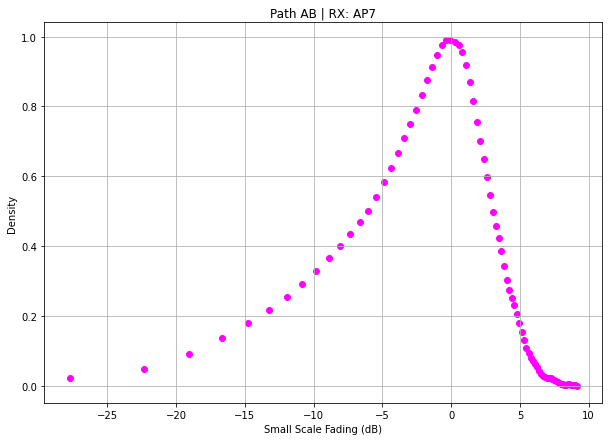

In [39]:
nAP = 'AP7'
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [40]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata)
(1699, 420)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP7

Best Fitness: 1573.8107299488072
Best Gen: 5
Kappa: 2.839205645760823
Mu: 0.817372790707367
Omega: 1.1393604360023504
Elapsed time is 53.796062707901 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP7

Best Fitness: 58.41053340674811
Best Gen: 24
Kappa: 18.560465865970087
Mu: 0.17360120583505717
Omega: 1.2874866776123317
Elapsed time is 58.13555026054382 seconds.


(1699, 420)

In [41]:
print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata)
(1002, 277)

============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP7

Best Fitness: [1002.70717628]
Best Gen: 197
Alpha: 3.317522867620921
Mu: 0.7189164692912495
R_hat: 1.1450759728812416
Elapsed time is 43.04624056816101 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP7

Best Fitness: 251.02755506394288
Best Gen: 36
Alpha: 2.660424829661068
Mu: 0.9146823168153057
R_hat: 1.1446757480536387
Elapsed time is 22.8272647857666 seconds.


(1002, 277)

#### Plots

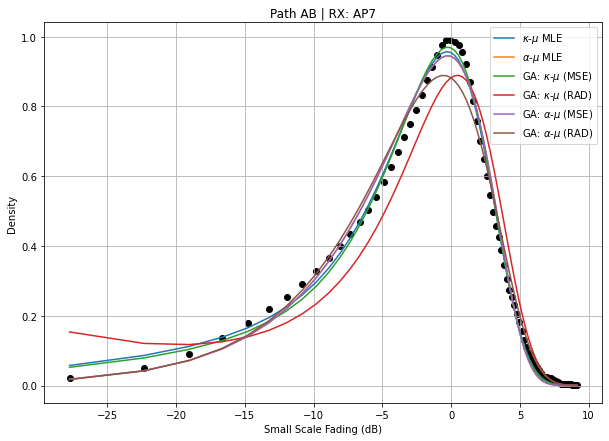

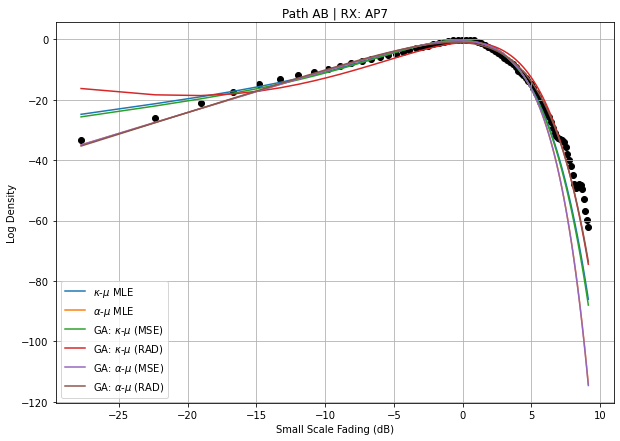

In [42]:
mle_ku_pathAB_ap7 = [2.7588, 0.80981, 1.1366] # KappaMu MLE
mle_au_pathAB_ap7 = [3.3109, 0.72071, 1.1448] # AlphaMu MLE
ku_AB_ap7_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap7[0], mle_ku_pathAB_ap7[1], mle_ku_pathAB_ap7[2]).astype(float)
au_AB_ap7_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap7[0], mle_au_pathAB_ap7[1], mle_au_pathAB_ap7[2]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), ku_AB_ap7_pdf, label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), au_AB_ap7_pdf, label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(ku_AB_ap7_pdf), label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(au_AB_ap7_pdf), label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse)), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad)), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse)), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad)), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [43]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

# AIC MLE - KAPPA MU
sum = np.sum(np.log(KappaMuPDF(data, mle_ku_pathAB_ap7[0], mle_ku_pathAB_ap7[1], mle_ku_pathAB_ap7[2]).astype(float)))
AIC_mle_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC MLE - ALPHA MU
sum = np.sum(np.log(AlphaMuPDF(data, mle_au_pathAB_ap7[0], mle_au_pathAB_ap7[1], mle_au_pathAB_ap7[2]).astype(float)))
AIC_mle_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_mse, ku_mu_mse, ku_omega_mse)))
AIC_ga_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_rad, ku_mu_rad, ku_omega_rad)))
AIC_ga_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: MSE
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_mse, au_mu_mse, au_r_hat_mse)))
AIC_ga_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: RAD
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_rad, au_mu_rad, au_r_hat_rad)))
AIC_ga_alpha_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

rads = {'Methods':['MLE - KappaMu', 'MLE - AlphaMu', \
                   'GA - KappaMu (Fitness = MSE)', 'GA - KappaMu (Fitness = RAD)',\
                   'GA - AlphaMu (Fitness = MSE)', 'GA - AlphaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_kappa_mu, AIC_mle_alpha_mu, AIC_ga_kappa_mu, AIC_ga_kappa_mu_rad, AIC_ga_alpha_mu , AIC_ga_alpha_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - AlphaMu (Fitness = RAD),19865.278297
1,MLE - KappaMu,19939.579846
2,GA - KappaMu (Fitness = MSE),19963.675084
3,MLE - AlphaMu,20149.937527
4,GA - AlphaMu (Fitness = MSE),20154.664874
5,GA - KappaMu (Fitness = RAD),21100.091604


### AP 8

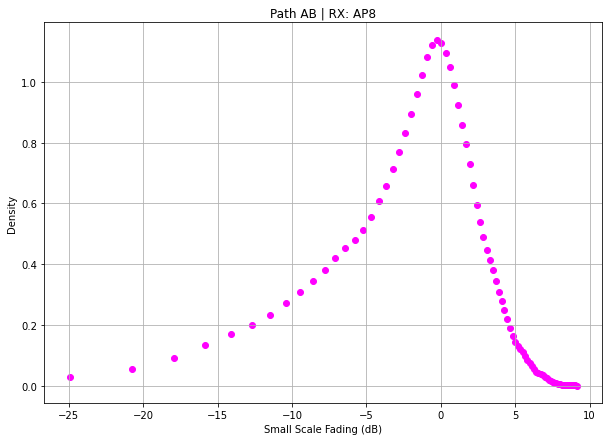

In [44]:
nAP = 'AP8'
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [45]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata)
(512, 160)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP8

Best Fitness: 504.67744069735716
Best Gen: 6
Kappa: 6.2493559917254
Mu: 0.5105356072282572
Omega: 1.0869795989420743
Elapsed time is 50.2277717590332 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP8

Best Fitness: 124.35760786207592
Best Gen: 199
Kappa: 96.85475231746604
Mu: 0.03356542518646185
Omega: 1.114514768463113
Elapsed time is 44.341893434524536 seconds.


(512, 160)

In [46]:
print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata)
(349, 126)

============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP8

Best Fitness: [349.51742641]
Best Gen: 163
Alpha: 3.0989622956486733
Mu: 0.9036119868479942
R_hat: 1.1122893662897577
Elapsed time is 41.12523865699768 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP8

Best Fitness: 51.71831819714523
Best Gen: 3
Alpha: 2.004666380691194
Mu: 1.6902602531193265
R_hat: 1.1455747970755865
Elapsed time is 23.98705816268921 seconds.


(349, 126)

#### Plots

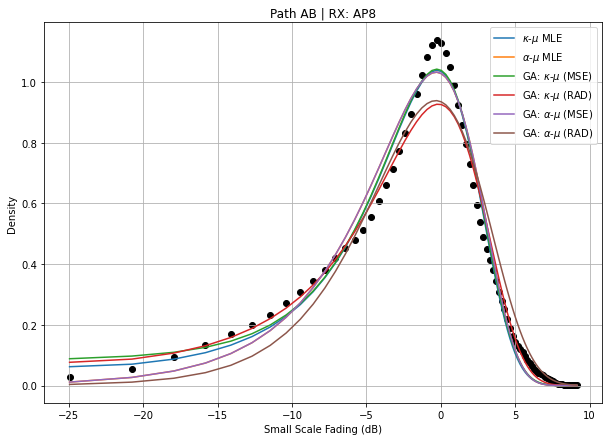

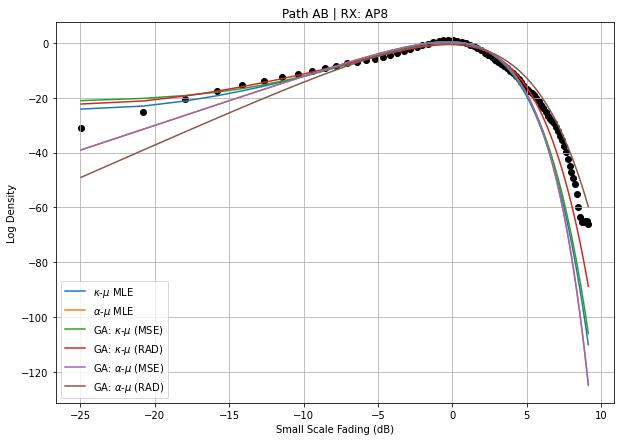

In [47]:
mle_ku_pathAB_ap8 = [70, 0.054552, 1.0672] # KappaMu MLE
mle_au_pathAB_ap8 = [3.0939, 0.90552, 1.1124] # AlphaMu MLE
ku_AB_ap8_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap8[0], mle_ku_pathAB_ap8[1], mle_ku_pathAB_ap8[2]).astype(float)
au_AB_ap8_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap8[0], mle_au_pathAB_ap8[1], mle_au_pathAB_ap8[2]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), ku_AB_ap8_pdf, label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), au_AB_ap8_pdf, label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(ku_AB_ap8_pdf), label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(au_AB_ap8_pdf), label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse)), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad)), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse)), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad)), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [48]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

# AIC MLE - KAPPA MU
sum = np.sum(np.log(KappaMuPDF(data, mle_ku_pathAB_ap8[0], mle_ku_pathAB_ap8[1], mle_ku_pathAB_ap8[2]).astype(float)))
AIC_mle_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC MLE - ALPHA MU
sum = np.sum(np.log(AlphaMuPDF(data, mle_au_pathAB_ap8[0], mle_au_pathAB_ap8[1], mle_au_pathAB_ap8[2]).astype(float)))
AIC_mle_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_mse, ku_mu_mse, ku_omega_mse)))
AIC_ga_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_rad, ku_mu_rad, ku_omega_rad)))
AIC_ga_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: MSE
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_mse, au_mu_mse, au_r_hat_mse)))
AIC_ga_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: RAD
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_rad, au_mu_rad, au_r_hat_rad)))
AIC_ga_alpha_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

rads = {'Methods':['MLE - KappaMu', 'MLE - AlphaMu', \
                   'GA - KappaMu (Fitness = MSE)', 'GA - KappaMu (Fitness = RAD)',\
                   'GA - AlphaMu (Fitness = MSE)', 'GA - AlphaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_kappa_mu, AIC_mle_alpha_mu, AIC_ga_kappa_mu, AIC_ga_kappa_mu_rad, AIC_ga_alpha_mu , AIC_ga_alpha_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = MSE),18946.133527
1,MLE - AlphaMu,19010.430870
2,GA - AlphaMu (Fitness = MSE),19018.679948
3,GA - AlphaMu (Fitness = RAD),19075.520096
4,MLE - KappaMu,19547.091216
5,GA - KappaMu (Fitness = RAD),19772.004323


### AP 9

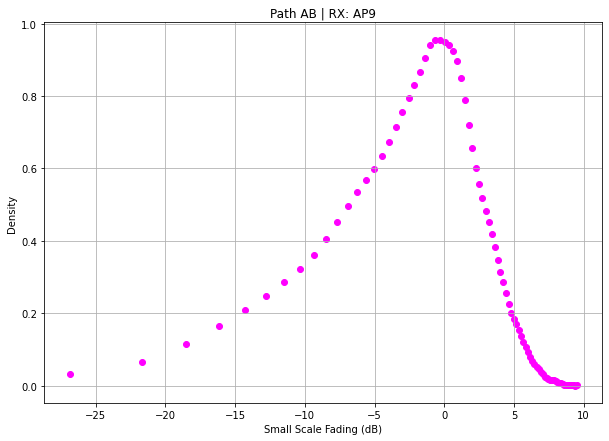

In [49]:
nAP = 'AP9'
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [50]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata)
(1264, 380)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP9

Best Fitness: 1264.0544608248401
Best Gen: 103
Kappa: 1.9131433998745113
Mu: 0.9090416440111743
Omega: 1.131488633944026
Elapsed time is 51.08687925338745 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP9

Best Fitness: 380.0340258339437
Best Gen: 65
Kappa: 0.9202268438376908
Mu: 1.1198760642662355
Omega: 1.1867426983601095
Elapsed time is 46.50464487075806 seconds.


(1264, 380)

In [51]:
print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata)
(890, 126)

============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP9

Best Fitness: [890.91517579]
Best Gen: 192
Alpha: 2.8403775759918646
Mu: 0.8306374413754667
R_hat: 1.1306363043277687
Elapsed time is 40.417972564697266 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP9

Best Fitness: 38.13995388729765
Best Gen: 23
Alpha: 0.9896618267705148
Mu: 3.9187359465456035
R_hat: 1.033755407545057
Elapsed time is 22.49161458015442 seconds.


(890, 126)

#### Plots

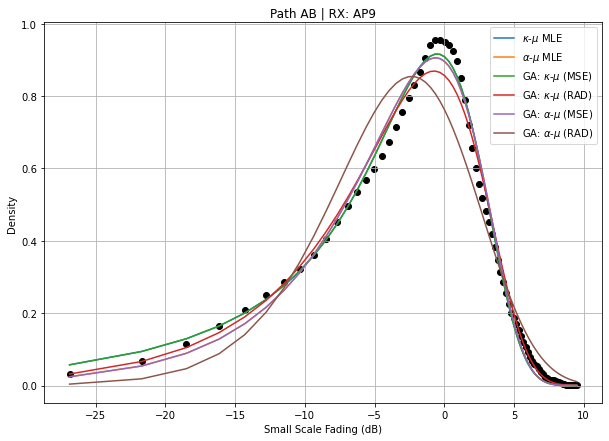

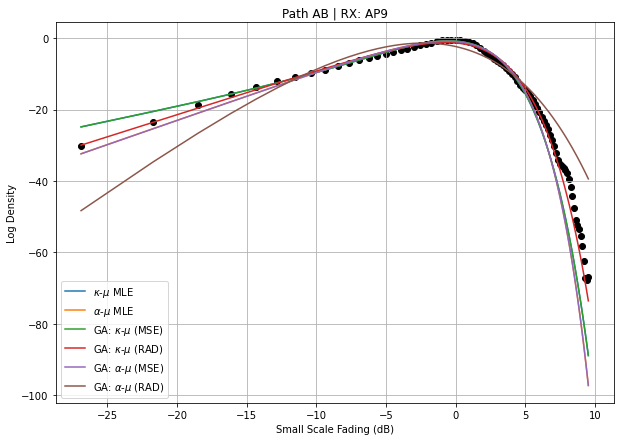

In [52]:
mle_ku_pathAB_ap9 = [1.9103, 0.90984, 1.1314] # KappaMu MLE
mle_au_pathAB_ap9 = [2.8416, 0.82981, 1.1307] # AlphaMu MLE
ku_AB_ap9_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap9[0], mle_ku_pathAB_ap9[1], mle_ku_pathAB_ap9[2]).astype(float)
au_AB_ap9_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap9[0], mle_au_pathAB_ap9[1], mle_au_pathAB_ap9[2]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), ku_AB_ap9_pdf, label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), au_AB_ap9_pdf, label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(ku_AB_ap9_pdf), label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(au_AB_ap9_pdf), label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse)), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad)), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse)), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad)), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [53]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

# AIC MLE - KAPPA MU
sum = np.sum(np.log(KappaMuPDF(data, mle_ku_pathAB_ap9[0], mle_ku_pathAB_ap9[1], mle_ku_pathAB_ap9[2]).astype(float)))
AIC_mle_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC MLE - ALPHA MU
sum = np.sum(np.log(AlphaMuPDF(data, mle_au_pathAB_ap9[0], mle_au_pathAB_ap9[1], mle_au_pathAB_ap9[2]).astype(float)))
AIC_mle_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_mse, ku_mu_mse, ku_omega_mse)))
AIC_ga_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_rad, ku_mu_rad, ku_omega_rad)))
AIC_ga_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: MSE
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_mse, au_mu_mse, au_r_hat_mse)))
AIC_ga_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: RAD
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_rad, au_mu_rad, au_r_hat_rad)))
AIC_ga_alpha_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

rads = {'Methods':['MLE - KappaMu', 'MLE - AlphaMu', \
                   'GA - KappaMu (Fitness = MSE)', 'GA - KappaMu (Fitness = RAD)',\
                   'GA - AlphaMu (Fitness = MSE)', 'GA - AlphaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_kappa_mu, AIC_mle_alpha_mu, AIC_ga_kappa_mu, AIC_ga_kappa_mu_rad, AIC_ga_alpha_mu , AIC_ga_alpha_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),20945.856417
1,MLE - KappaMu,21146.497402
2,GA - KappaMu (Fitness = MSE),21146.511305
3,MLE - AlphaMu,21154.779206
4,GA - AlphaMu (Fitness = MSE),21154.819311
5,GA - AlphaMu (Fitness = RAD),22090.107063


## $\alpha$-$\mu$ and $\kappa$-$\mu$ - Path: BA



In [54]:
path = 'BA'

### AP 1

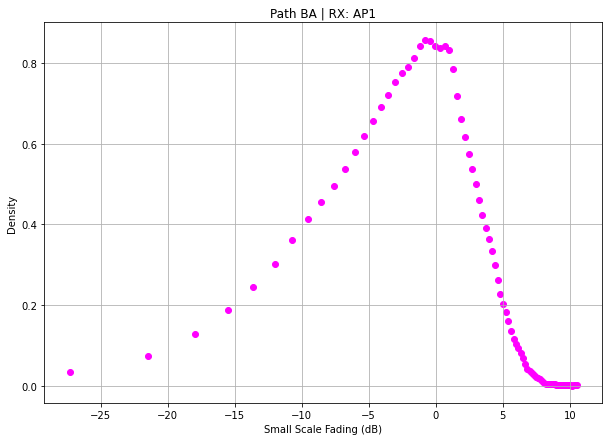

In [55]:
nAP = 'AP1'
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [56]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata)
(4526)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP1

Best Fitness: 4526.690676431699
Best Gen: 19
Kappa: 1.0738864755999804
Mu: 1.0148592550717854
Omega: 1.1877496074428033
Elapsed time is 49.55547285079956 seconds.


4526

In [57]:
fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata)
(1397)

Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP1

Best Fitness: 1397.8482662945887
Best Gen: 185
Kappa: 0.7529153992793869
Mu: 1.092809554067429
Omega: 1.2068876130893227
Elapsed time is 42.82447266578674 seconds.


1397

In [58]:
print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata)
(3752)

============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP1

Best Fitness: [3752.31593276]
Best Gen: 195
Alpha: 2.707563435106364
Mu: 0.7910257907862239
R_hat: 1.1482408284614842
Elapsed time is 38.3191556930542 seconds.


3752

In [59]:
fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata)
(1180)

Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP1

Best Fitness: 50.70268796416302
Best Gen: 105
Alpha: 1.37517614023439
Mu: 2.702304937869087
R_hat: 1.1008414425390538
Elapsed time is 20.177021026611328 seconds.


1180

#### Plots

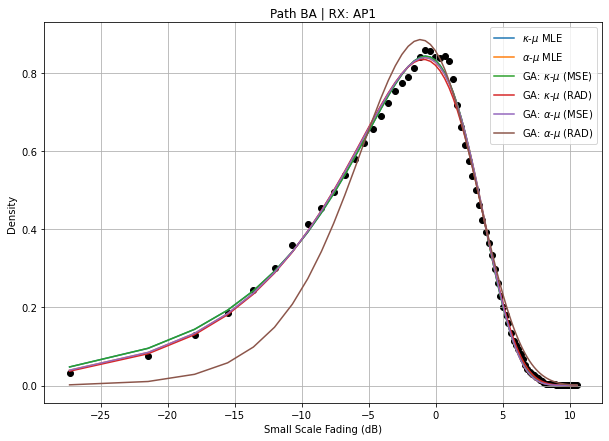

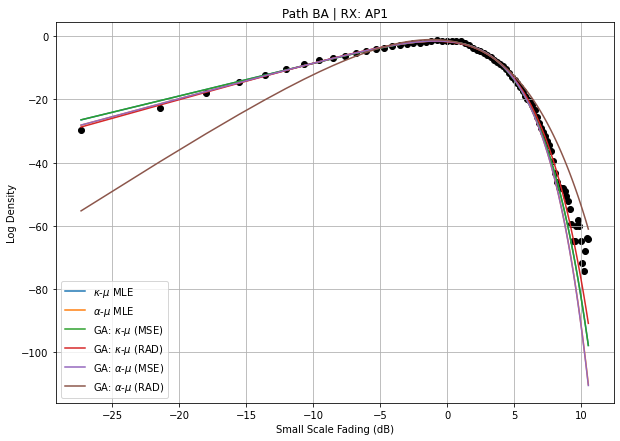

In [60]:
mle_ku_pathBA_ap1 = [1.0728, 1.0154, 1.1878] # KappaMu MLE
mle_au_pathBA_ap1 = [2.7032, 0.79288, 1.1482] # AlphaMu MLE
ku_BA_ap1_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap1[0], mle_ku_pathBA_ap1[1], mle_ku_pathBA_ap1[2]).astype(float)
au_BA_ap1_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap1[0], mle_au_pathBA_ap1[1], mle_au_pathBA_ap1[2]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), ku_BA_ap1_pdf, label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), au_BA_ap1_pdf, label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(ku_BA_ap1_pdf), label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(au_BA_ap1_pdf), label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse)), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad)), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse)), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad)), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [61]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

# AIC MLE - KAPPA MU
sum = np.sum(np.log(KappaMuPDF(data, mle_ku_pathBA_ap1[0], mle_ku_pathBA_ap1[1], mle_ku_pathBA_ap1[2]).astype(float)))
AIC_mle_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC MLE - ALPHA MU
sum = np.sum(np.log(AlphaMuPDF(data, mle_au_pathBA_ap1[0], mle_au_pathBA_ap1[1], mle_au_pathBA_ap1[2]).astype(float)))
AIC_mle_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_mse, ku_mu_mse, ku_omega_mse)))
AIC_ga_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_rad, ku_mu_rad, ku_omega_rad)))
AIC_ga_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: MSE
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_mse, au_mu_mse, au_r_hat_mse)))
AIC_ga_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: RAD
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_rad, au_mu_rad, au_r_hat_rad)))
AIC_ga_alpha_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

rads = {'Methods':['MLE - KappaMu', 'MLE - AlphaMu', \
                   'GA - KappaMu (Fitness = MSE)', 'GA - KappaMu (Fitness = RAD)',\
                   'GA - AlphaMu (Fitness = MSE)', 'GA - AlphaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_kappa_mu, AIC_mle_alpha_mu, AIC_ga_kappa_mu, AIC_ga_kappa_mu_rad, AIC_ga_alpha_mu , AIC_ga_alpha_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),25385.734667
1,MLE - KappaMu,25425.449618
2,GA - KappaMu (Fitness = MSE),25425.691453
3,MLE - AlphaMu,25442.893688
4,GA - AlphaMu (Fitness = MSE),25444.693223
5,GA - AlphaMu (Fitness = RAD),26483.229943


### AP 2

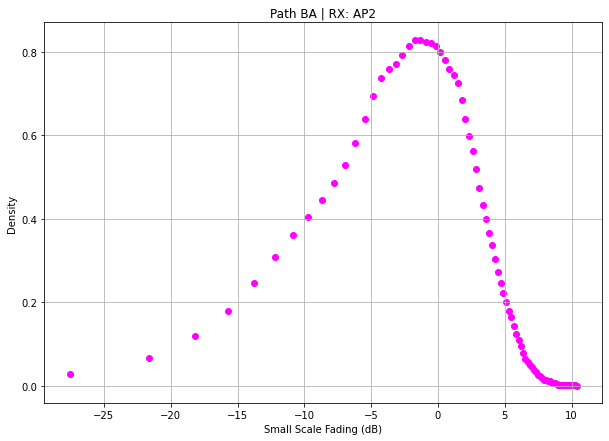

In [62]:
nAP = 'AP2'
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [63]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata)
(12580)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP2

Best Fitness: 12579.416875956931
Best Gen: 165
Kappa: 0.5911402547233432
Mu: 1.1169507680993098
Omega: 1.2009684183915048
Elapsed time is 47.497610569000244 seconds.


12580

In [64]:
fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata)
(2503)

Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP2

Best Fitness: 318.9420880178934
Best Gen: 199
Kappa: 410.9440400496894
Mu: 0.004482458923889047
Omega: 1.0241969645098659
Elapsed time is 42.217103004455566 seconds.


2503

In [65]:
print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata)
(12151)

============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP2

Best Fitness: [12151.33496272]
Best Gen: 147
Alpha: 2.3349853301646872
Mu: 0.9567132441663679
R_hat: 1.1278965339929408
Elapsed time is 38.38165879249573 seconds.


12151

In [66]:
fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata)
(488)

Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP2

Best Fitness: 112.1953301452368
Best Gen: 19
Alpha: 2.167774328936309
Mu: 1.2508679238633118
R_hat: 1.160644359467947
Elapsed time is 20.352805614471436 seconds.


488

#### Plots

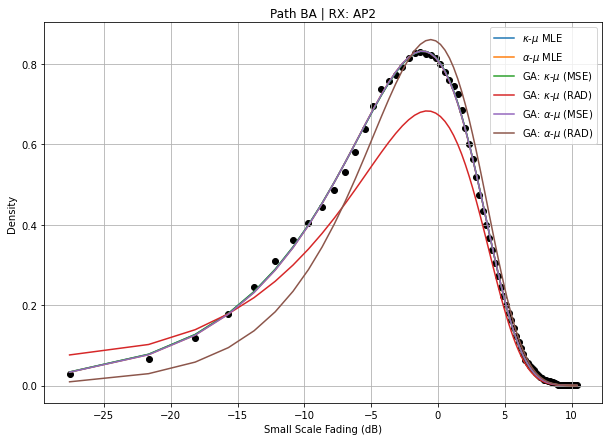

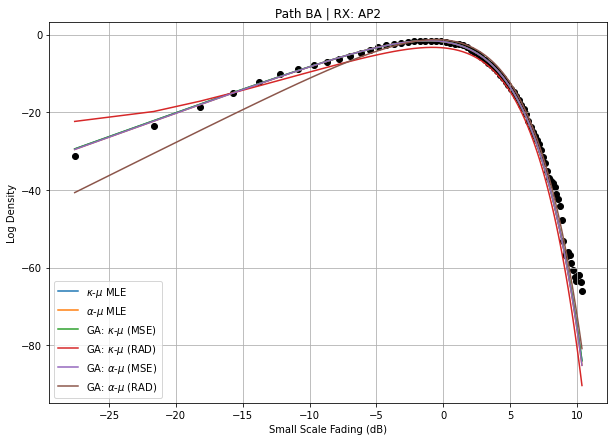

In [67]:
mle_ku_pathBA_ap2 = [0.5874, 1.1176, 1.2014] # KappaMu MLE
mle_au_pathBA_ap2 = [2.3342, 0.95683, 1.1278] # AlphaMu MLE
ku_BA_ap2_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap2[0], mle_ku_pathBA_ap2[1], mle_ku_pathBA_ap2[2]).astype(float)
au_BA_ap2_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap2[0], mle_au_pathBA_ap2[1], mle_au_pathBA_ap2[2]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), ku_BA_ap2_pdf, label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), au_BA_ap2_pdf, label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(ku_BA_ap2_pdf), label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(au_BA_ap2_pdf), label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse)), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad)), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse)), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad)), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [68]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

# AIC MLE - KAPPA MU
sum = np.sum(np.log(KappaMuPDF(data, mle_ku_pathBA_ap2[0], mle_ku_pathBA_ap2[1], mle_ku_pathBA_ap2[2]).astype(float)))
AIC_mle_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC MLE - ALPHA MU
sum = np.sum(np.log(AlphaMuPDF(data, mle_au_pathBA_ap2[0], mle_au_pathBA_ap2[1], mle_au_pathBA_ap2[2]).astype(float)))
AIC_mle_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_mse, ku_mu_mse, ku_omega_mse)))
AIC_ga_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_rad, ku_mu_rad, ku_omega_rad)))
AIC_ga_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: MSE
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_mse, au_mu_mse, au_r_hat_mse)))
AIC_ga_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: RAD
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_rad, au_mu_rad, au_r_hat_rad)))
AIC_ga_alpha_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

rads = {'Methods':['MLE - KappaMu', 'MLE - AlphaMu', \
                   'GA - KappaMu (Fitness = MSE)', 'GA - KappaMu (Fitness = RAD)',\
                   'GA - AlphaMu (Fitness = MSE)', 'GA - AlphaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_kappa_mu, AIC_mle_alpha_mu, AIC_ga_kappa_mu, AIC_ga_kappa_mu_rad, AIC_ga_alpha_mu , AIC_ga_alpha_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,MLE - AlphaMu,25427.437296
1,GA - AlphaMu (Fitness = MSE),25427.544835
2,MLE - KappaMu,25427.547122
3,GA - KappaMu (Fitness = MSE),25428.347984
4,GA - AlphaMu (Fitness = RAD),25861.411514
5,GA - KappaMu (Fitness = RAD),32425.147192


### AP 3

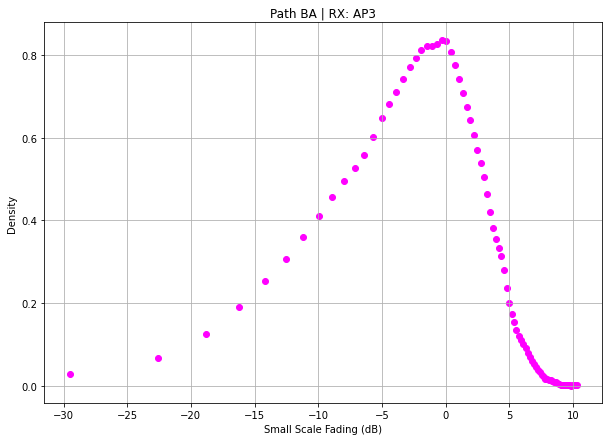

In [69]:
nAP = 'AP3'
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [70]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata)
(7789)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP3

Best Fitness: 7789.898595463097
Best Gen: 158
Kappa: 0.8727897469296139
Mu: 1.0205585513703295
Omega: 1.1963614723225453
Elapsed time is 47.7663311958313 seconds.


7789

In [71]:
fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata)
(1203)

Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP3

Best Fitness: 1203.7173250292144
Best Gen: 141
Kappa: 0.5088579656453835
Mu: 1.095514172662418
Omega: 1.2226883665493715
Elapsed time is 43.13414740562439 seconds.


1203

In [72]:
print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata)
(6495.16)

============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP3

Best Fitness: [6493.34823598]
Best Gen: 185
Alpha: 2.5516103638541905
Mu: 0.822153646756866
R_hat: 1.144169711936831
Elapsed time is 38.62483859062195 seconds.


6495.16

In [73]:
fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata)
(327)

Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP3

Best Fitness: 286.9747323538269
Best Gen: 136
Alpha: 2.2902395333187564
Mu: 0.950806842109759
R_hat: 1.1786014474810558
Elapsed time is 20.821356058120728 seconds.


327

#### Plots

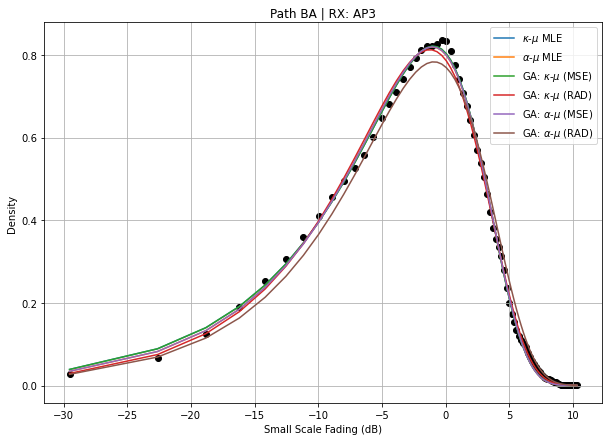

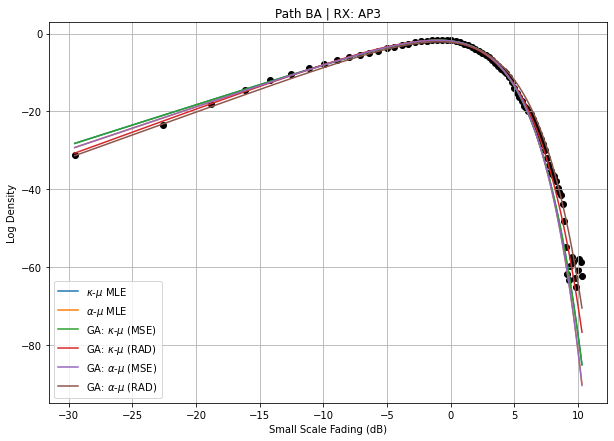

In [74]:
mle_ku_pathBA_ap3 = [0.87074, 1.0208, 1.1965] # KappaMu MLE
mle_au_pathBA_ap3 = [2.5463, 0.82408, 1.1439] # AlphaMu MLE
ku_BA_ap3_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap3[0], mle_ku_pathBA_ap3[1], mle_ku_pathBA_ap3[2]).astype(float)
au_BA_ap3_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap3[0], mle_au_pathBA_ap3[1], mle_au_pathBA_ap3[2]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), ku_BA_ap3_pdf, label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), au_BA_ap3_pdf, label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(ku_BA_ap3_pdf), label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(au_BA_ap3_pdf), label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse)), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad)), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse)), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad)), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [75]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

# AIC MLE - KAPPA MU
sum = np.sum(np.log(KappaMuPDF(data, mle_ku_pathBA_ap3[0], mle_ku_pathBA_ap3[1], mle_ku_pathBA_ap3[2]).astype(float)))
AIC_mle_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC MLE - ALPHA MU
sum = np.sum(np.log(AlphaMuPDF(data, mle_au_pathBA_ap3[0], mle_au_pathBA_ap3[1], mle_au_pathBA_ap3[2]).astype(float)))
AIC_mle_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_mse, ku_mu_mse, ku_omega_mse)))
AIC_ga_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_rad, ku_mu_rad, ku_omega_rad)))
AIC_ga_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: MSE
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_mse, au_mu_mse, au_r_hat_mse)))
AIC_ga_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: RAD
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_rad, au_mu_rad, au_r_hat_rad)))
AIC_ga_alpha_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

rads = {'Methods':['MLE - KappaMu', 'MLE - AlphaMu', \
                   'GA - KappaMu (Fitness = MSE)', 'GA - KappaMu (Fitness = RAD)',\
                   'GA - AlphaMu (Fitness = MSE)', 'GA - AlphaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_kappa_mu, AIC_mle_alpha_mu, AIC_ga_kappa_mu, AIC_ga_kappa_mu_rad, AIC_ga_alpha_mu , AIC_ga_alpha_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),24779.798732
1,MLE - KappaMu,24833.717707
2,GA - KappaMu (Fitness = MSE),24834.260379
3,MLE - AlphaMu,24842.314912
4,GA - AlphaMu (Fitness = MSE),24844.420688
5,GA - AlphaMu (Fitness = RAD),24926.755858


### AP 4

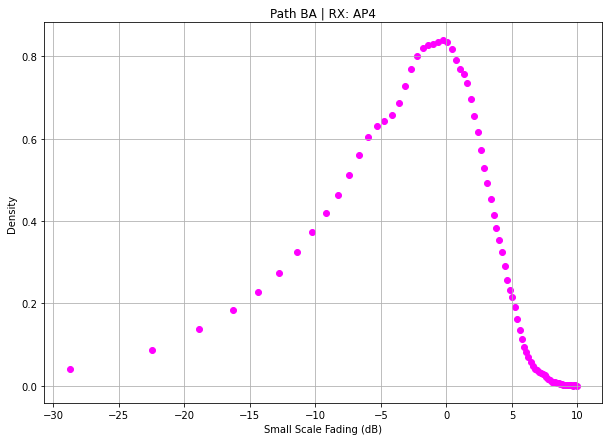

In [76]:
nAP = 'AP4'
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [77]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata)
(9920) 

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP4

Best Fitness: 1744.53851692586
Best Gen: 5
Kappa: 2.052659959303398
Mu: 0.8145359289577967
Omega: 1.207521607665186
Elapsed time is 46.94119167327881 seconds.


9920

In [78]:
fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata)
(1525)

Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP4

Best Fitness: 1525.4199888040357
Best Gen: 189
Kappa: 0.9683137548439585
Mu: 1.0167623771548602
Omega: 1.2059974097525819
Elapsed time is 42.49381494522095 seconds.


1525

In [79]:
print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata)
(7493.54) # max 13543

============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP4

Best Fitness: [7494.15976821]
Best Gen: 133
Alpha: 2.8772287098482745
Mu: 0.713947674278332
R_hat: 1.1614396744756854
Elapsed time is 38.47599244117737 seconds.


7493.54

In [80]:
fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata)
(470)

Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP4

Best Fitness: 34.32380089623998
Best Gen: 1
Alpha: 0.988618112431496
Mu: 4.7192406812000325
R_hat: 1.0527725748970114
Elapsed time is 20.919247150421143 seconds.


470

#### Plots

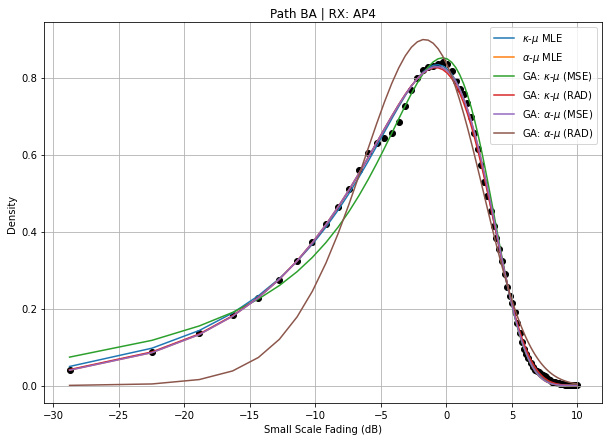

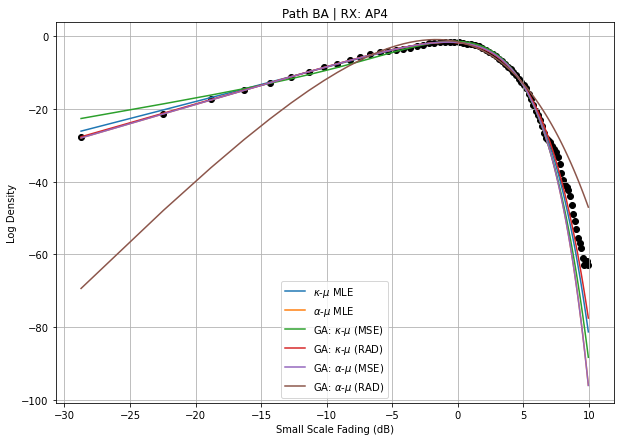

In [81]:
mle_ku_pathBA_ap4 = [1.2076, 0.96427, 1.1942] # KappaMu MLE
mle_au_pathBA_ap4 = [2.8763, 0.71398, 1.1614] # AlphaMu MLE
ku_BA_ap4_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap4[0], mle_ku_pathBA_ap4[1], mle_ku_pathBA_ap4[2]).astype(float)
au_BA_ap4_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap4[0], mle_au_pathBA_ap4[1], mle_au_pathBA_ap4[2]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), ku_BA_ap4_pdf, label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), au_BA_ap4_pdf, label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(ku_BA_ap4_pdf), label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(au_BA_ap4_pdf), label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse)), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad)), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse)), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad)), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [82]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

# AIC MLE - KAPPA MU
sum = np.sum(np.log(KappaMuPDF(data, mle_ku_pathBA_ap4[0], mle_ku_pathBA_ap4[1], mle_ku_pathBA_ap4[2]).astype(float)))
AIC_mle_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC MLE - ALPHA MU
sum = np.sum(np.log(AlphaMuPDF(data, mle_au_pathBA_ap4[0], mle_au_pathBA_ap4[1], mle_au_pathBA_ap4[2]).astype(float)))
AIC_mle_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_mse, ku_mu_mse, ku_omega_mse)))
AIC_ga_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_rad, ku_mu_rad, ku_omega_rad)))
AIC_ga_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: MSE
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_mse, au_mu_mse, au_r_hat_mse)))
AIC_ga_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: RAD
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_rad, au_mu_rad, au_r_hat_rad)))
AIC_ga_alpha_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

rads = {'Methods':['MLE - KappaMu', 'MLE - AlphaMu', \
                   'GA - KappaMu (Fitness = MSE)', 'GA - KappaMu (Fitness = RAD)',\
                   'GA - AlphaMu (Fitness = MSE)', 'GA - AlphaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_kappa_mu, AIC_mle_alpha_mu, AIC_ga_kappa_mu, AIC_ga_kappa_mu_rad, AIC_ga_alpha_mu , AIC_ga_alpha_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),25153.499345
1,MLE - KappaMu,25174.263565
2,MLE - AlphaMu,25232.135044
3,GA - AlphaMu (Fitness = MSE),25232.666331
4,GA - KappaMu (Fitness = MSE),25322.532470
5,GA - AlphaMu (Fitness = RAD),26947.889985


### AP 5

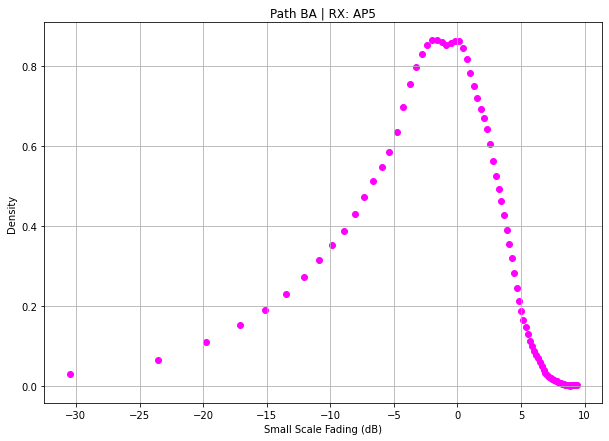

In [83]:
nAP = 'AP5'
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [84]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata)
(5756)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP5

Best Fitness: 5756.304174588337
Best Gen: 126
Kappa: 1.1125956668595427
Mu: 1.057441655639862
Omega: 1.181525107044506
Elapsed time is 47.58052635192871 seconds.


5756

In [85]:
fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata)
(2247.12)

Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP5

Best Fitness: 948.8476504933681
Best Gen: 9
Kappa: 1.405743602632302
Mu: 0.9338347353769757
Omega: 1.1685120950138683
Elapsed time is 42.341973543167114 seconds.


2247.12

In [86]:
print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata)
(4603)

============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP5

Best Fitness: [4603.43356262]
Best Gen: 173
Alpha: 2.6693229046790603
Mu: 0.8522796562568619
R_hat: 1.1419835546298354
Elapsed time is 38.515950441360474 seconds.


4603

In [87]:
fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata)
(1316)

Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP5

Best Fitness: 171.82724689815052
Best Gen: 45
Alpha: 2.0088298697647455
Mu: 1.1867126292784502
R_hat: 1.1150404755000747
Elapsed time is 20.40078639984131 seconds.


1316

#### Plots

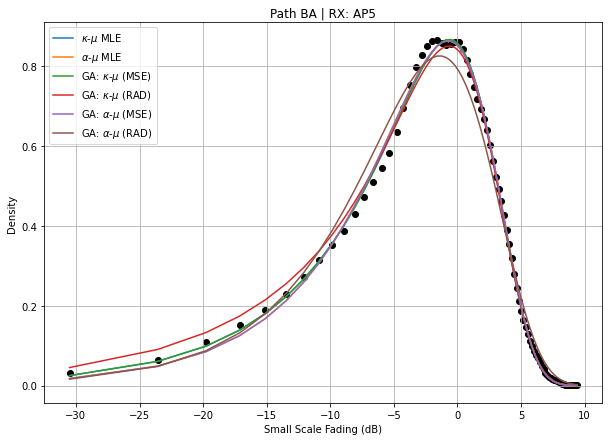

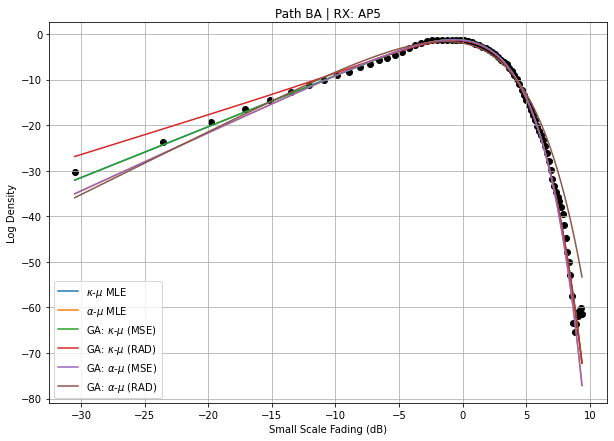

In [88]:
mle_ku_pathBA_ap5 = [1.1126, 1.0574, 1.1813] # KappaMu MLE
mle_au_pathBA_ap5 = [2.6665, 0.85346, 1.1417] # AlphaMu MLE
ku_BA_ap5_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap5[0], mle_ku_pathBA_ap5[1], mle_ku_pathBA_ap5[2]).astype(float)
au_BA_ap5_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap5[0], mle_au_pathBA_ap5[1], mle_au_pathBA_ap5[2]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), ku_BA_ap5_pdf, label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), au_BA_ap5_pdf, label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(ku_BA_ap5_pdf), label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(au_BA_ap5_pdf), label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse)), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad)), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse)), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad)), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [89]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

# AIC MLE - KAPPA MU
sum = np.sum(np.log(KappaMuPDF(data, mle_ku_pathBA_ap5[0], mle_ku_pathBA_ap5[1], mle_ku_pathBA_ap5[2]).astype(float)))
AIC_mle_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC MLE - ALPHA MU
sum = np.sum(np.log(AlphaMuPDF(data, mle_au_pathBA_ap5[0], mle_au_pathBA_ap5[1], mle_au_pathBA_ap5[2]).astype(float)))
AIC_mle_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_mse, ku_mu_mse, ku_omega_mse)))
AIC_ga_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_rad, ku_mu_rad, ku_omega_rad)))
AIC_ga_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: MSE
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_mse, au_mu_mse, au_r_hat_mse)))
AIC_ga_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: RAD
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_rad, au_mu_rad, au_r_hat_rad)))
AIC_ga_alpha_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

rads = {'Methods':['MLE - KappaMu', 'MLE - AlphaMu', \
                   'GA - KappaMu (Fitness = MSE)', 'GA - KappaMu (Fitness = RAD)',\
                   'GA - AlphaMu (Fitness = MSE)', 'GA - AlphaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_kappa_mu, AIC_mle_alpha_mu, AIC_ga_kappa_mu, AIC_ga_kappa_mu_rad, AIC_ga_alpha_mu , AIC_ga_alpha_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = MSE),22977.739896
1,MLE - KappaMu,22977.786163
2,MLE - AlphaMu,22991.054595
3,GA - AlphaMu (Fitness = MSE),22991.235492
4,GA - KappaMu (Fitness = RAD),23032.484165
5,GA - AlphaMu (Fitness = RAD),23257.200537


### AP 6

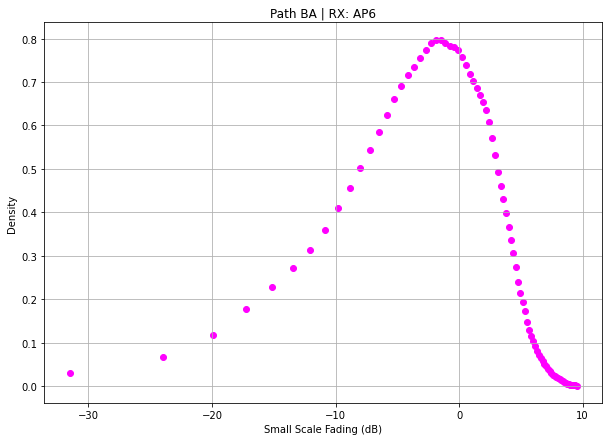

In [90]:
nAP = 'AP6'
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [91]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata)
(11486)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP6

Best Fitness: 11487.080680226974
Best Gen: 62
Kappa: 0.7050760041747489
Mu: 1.0284316419358077
Omega: 1.2219121131055084
Elapsed time is 47.976114988327026 seconds.


11486

In [92]:
fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata)
(2017)

Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP6

Best Fitness: 604.6062921999246
Best Gen: 199
Kappa: 654.0450828512869
Mu: 0.002544182854352146
Omega: 0.9965657765266006
Elapsed time is 42.572158336639404 seconds.


2017

In [93]:
print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata)
(12163.48)

============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP6

Best Fitness: [12162.57795581]
Best Gen: 105
Alpha: 2.5120300425201796
Mu: 0.8120130334526903
R_hat: 1.1509467204148343
Elapsed time is 38.4553587436676 seconds.


12163.48

In [94]:
fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata)
(1204)

Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP6

Best Fitness: 52.18283622237461
Best Gen: 2
Alpha: 1.5502246442213257
Mu: 1.3474073284251542
R_hat: 1.1118070045486235
Elapsed time is 20.623555183410645 seconds.


1204

#### Plots

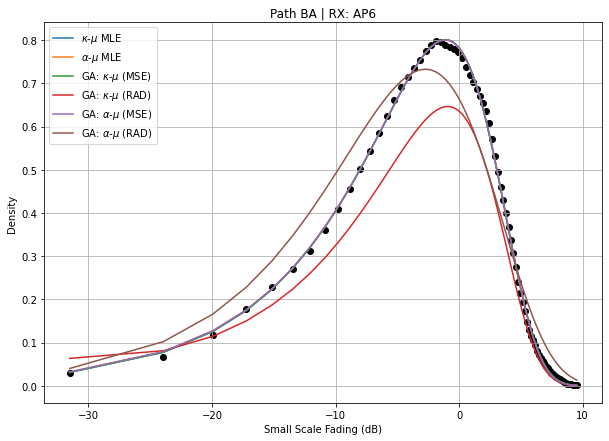

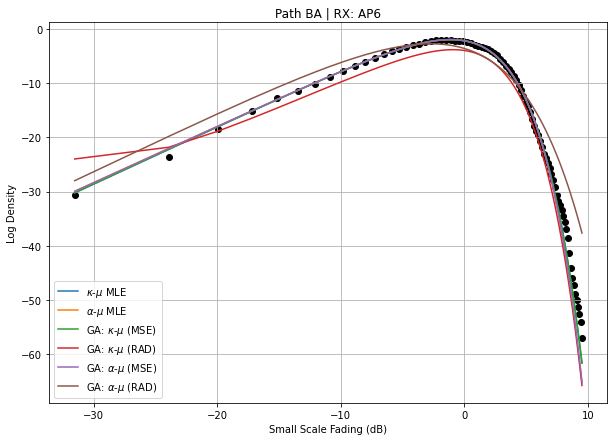

In [95]:
mle_ku_pathBA_ap6 = [0.70449, 1.0284, 1.222] # KappaMu MLE
mle_au_pathBA_ap6 = [2.5138, 0.81093, 1.151] # AlphaMu MLE
ku_BA_ap6_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap6[0], mle_ku_pathBA_ap6[1], mle_ku_pathBA_ap6[2]).astype(float)
au_BA_ap6_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap6[0], mle_au_pathBA_ap6[1], mle_au_pathBA_ap6[2]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), ku_BA_ap6_pdf, label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), au_BA_ap6_pdf, label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(ku_BA_ap6_pdf), label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(au_BA_ap6_pdf), label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse)), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad)), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse)), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad)), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [96]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

# AIC MLE - KAPPA MU
sum = np.sum(np.log(KappaMuPDF(data, mle_ku_pathBA_ap6[0], mle_ku_pathBA_ap6[1], mle_ku_pathBA_ap6[2]).astype(float)))
AIC_mle_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC MLE - ALPHA MU
sum = np.sum(np.log(AlphaMuPDF(data, mle_au_pathBA_ap6[0], mle_au_pathBA_ap6[1], mle_au_pathBA_ap6[2]).astype(float)))
AIC_mle_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_mse, ku_mu_mse, ku_omega_mse)))
AIC_ga_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_rad, ku_mu_rad, ku_omega_rad)))
AIC_ga_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: MSE
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_mse, au_mu_mse, au_r_hat_mse)))
AIC_ga_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: RAD
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_rad, au_mu_rad, au_r_hat_rad)))
AIC_ga_alpha_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

rads = {'Methods':['MLE - KappaMu', 'MLE - AlphaMu', \
                   'GA - KappaMu (Fitness = MSE)', 'GA - KappaMu (Fitness = RAD)',\
                   'GA - AlphaMu (Fitness = MSE)', 'GA - AlphaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_kappa_mu, AIC_mle_alpha_mu, AIC_ga_kappa_mu, AIC_ga_kappa_mu_rad, AIC_ga_alpha_mu , AIC_ga_alpha_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,MLE - KappaMu,26098.551921
1,GA - KappaMu (Fitness = MSE),26098.563862
2,GA - AlphaMu (Fitness = MSE),26113.445361
3,MLE - AlphaMu,26113.897136
4,GA - AlphaMu (Fitness = RAD),27227.073738
5,GA - KappaMu (Fitness = RAD),34501.291887


### AP 7

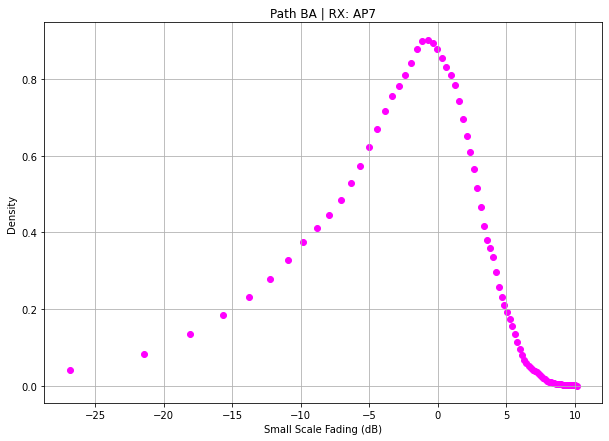

In [97]:
nAP = 'AP7'
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [98]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata)
(3949)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP7

Best Fitness: 1666.3285009444783
Best Gen: 4
Kappa: 1.3559514176777385
Mu: 0.9233392761980643
Omega: 1.1248374252549573
Elapsed time is 47.20891094207764 seconds.


3949

In [99]:
fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata)
(647)

Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP7

Best Fitness: 98.45065000328992
Best Gen: 10
Kappa: 33.91881323619687
Mu: 0.07238987018096277
Omega: 1.108765700569142
Elapsed time is 49.725295066833496 seconds.


647

In [100]:
print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata)
(2609)

============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP7

Best Fitness: [2609.04937199]
Best Gen: 129
Alpha: 2.665723525327452
Mu: 0.8509585847162062
R_hat: 1.1337421786582134
Elapsed time is 38.508957862854004 seconds.


2609

In [101]:
fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata)
(472)

Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP7

Best Fitness: 3.664514376456899
Best Gen: 13
Alpha: 6.545020397798545
Mu: 0.26267904441681283
R_hat: 1.0017063495713805
Elapsed time is 21.521621227264404 seconds.


472

#### Plots

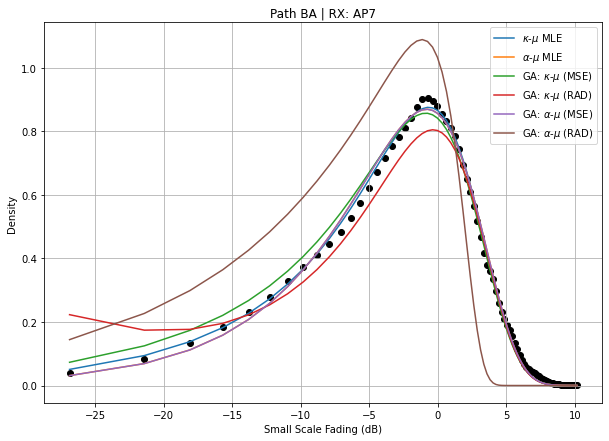

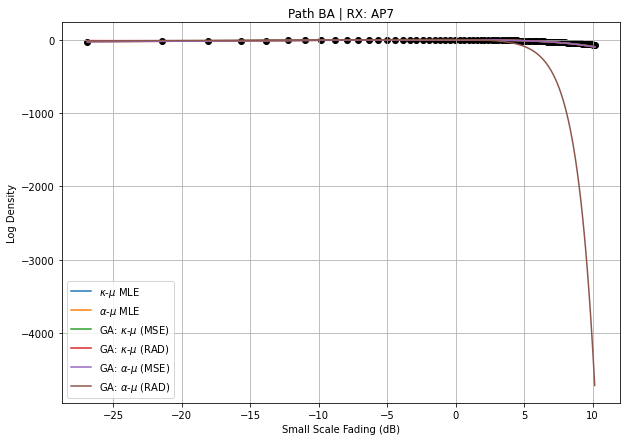

In [102]:
mle_ku_pathBA_ap7 = [1.3334, 0.99134, 1.1553] # KappaMu MLE
mle_au_pathBA_ap7 = [2.6677, 0.85012, 1.1337] # AlphaMu MLE
ku_BA_ap7_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap7[0], mle_ku_pathBA_ap7[1], mle_ku_pathBA_ap7[2]).astype(float)
au_BA_ap7_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap7[0], mle_au_pathBA_ap7[1], mle_au_pathBA_ap7[2]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), ku_BA_ap7_pdf, label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), au_BA_ap7_pdf, label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(ku_BA_ap7_pdf), label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(au_BA_ap7_pdf), label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse)), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad)), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse)), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad)), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [103]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

# AIC MLE - KAPPA MU
sum = np.sum(np.log(KappaMuPDF(data, mle_ku_pathBA_ap7[0], mle_ku_pathBA_ap7[1], mle_ku_pathBA_ap7[2]).astype(float)))
AIC_mle_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC MLE - ALPHA MU
sum = np.sum(np.log(AlphaMuPDF(data, mle_au_pathBA_ap7[0], mle_au_pathBA_ap7[1], mle_au_pathBA_ap7[2]).astype(float)))
AIC_mle_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_mse, ku_mu_mse, ku_omega_mse)))
AIC_ga_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_rad, ku_mu_rad, ku_omega_rad)))
AIC_ga_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: MSE
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_mse, au_mu_mse, au_r_hat_mse)))
AIC_ga_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: RAD
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_rad, au_mu_rad, au_r_hat_rad)))
AIC_ga_alpha_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

rads = {'Methods':['MLE - KappaMu', 'MLE - AlphaMu', \
                   'GA - KappaMu (Fitness = MSE)', 'GA - KappaMu (Fitness = RAD)',\
                   'GA - AlphaMu (Fitness = MSE)', 'GA - AlphaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_kappa_mu, AIC_mle_alpha_mu, AIC_ga_kappa_mu, AIC_ga_kappa_mu_rad, AIC_ga_alpha_mu , AIC_ga_alpha_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - AlphaMu (Fitness = MSE),25188.756338
1,MLE - KappaMu,25190.014422
2,MLE - AlphaMu,25190.415816
3,GA - KappaMu (Fitness = MSE),25275.903442
4,GA - KappaMu (Fitness = RAD),27971.810473
5,GA - AlphaMu (Fitness = RAD),111380.626861


### AP 8

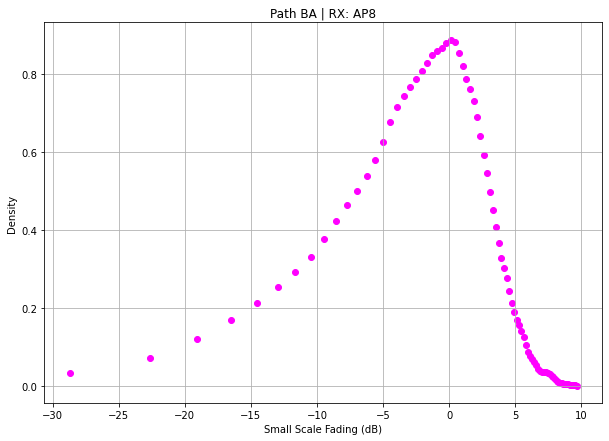

In [104]:
nAP = 'AP8'
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [105]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata)
(5071, 301)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP8

Best Fitness: 5071.148407784118
Best Gen: 194
Kappa: 1.56522789204252
Mu: 0.9391748758635212
Omega: 1.1610479425219353
Elapsed time is 47.60050415992737 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP8

Best Fitness: 249.5971327601165
Best Gen: 199
Kappa: 271.8008223814583
Mu: 0.008349501924861832
Omega: 1.0786851063153262
Elapsed time is 42.154168128967285 seconds.


(5071, 301)

In [106]:
print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata)
(2991, 68)

============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP8

Best Fitness: [2991.70057035]
Best Gen: 138
Alpha: 2.9758750846433757
Mu: 0.7303815402250394
R_hat: 1.149440561740922
Elapsed time is 38.54092574119568 seconds.
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP8

Best Fitness: 51.98985845420522
Best Gen: 7
Alpha: 1.2158093207898713
Mu: 3.4264248935126074
R_hat: 1.0624550780367559
Elapsed time is 20.780391931533813 seconds.


(2991, 68)

#### Plots

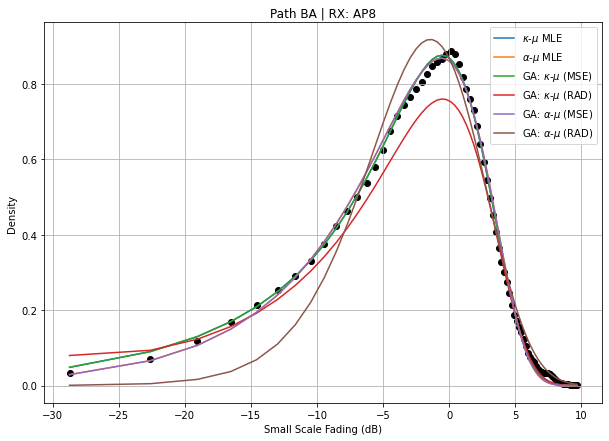

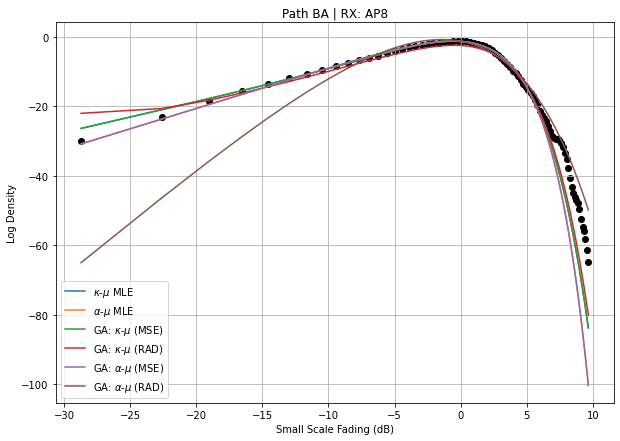

In [107]:
mle_ku_pathBA_ap8 = [1.5666, 0.9388, 1.1612] # KappaMu MLE
mle_au_pathBA_ap8 = [2.9771, 0.72971, 1.1493] # AlphaMu MLE
ku_BA_ap8_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap8[0], mle_ku_pathBA_ap8[1], mle_ku_pathBA_ap8[2]).astype(float)
au_BA_ap8_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap8[0], mle_au_pathBA_ap8[1], mle_au_pathBA_ap8[2]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), ku_BA_ap8_pdf, label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), au_BA_ap8_pdf, label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(ku_BA_ap8_pdf), label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(au_BA_ap8_pdf), label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse)), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad)), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse)), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad)), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [108]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

# AIC MLE - KAPPA MU
sum = np.sum(np.log(KappaMuPDF(data, mle_ku_pathBA_ap8[0], mle_ku_pathBA_ap8[1], mle_ku_pathBA_ap8[2]).astype(float)))
AIC_mle_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC MLE - ALPHA MU
sum = np.sum(np.log(AlphaMuPDF(data, mle_au_pathBA_ap8[0], mle_au_pathBA_ap8[1], mle_au_pathBA_ap8[2]).astype(float)))
AIC_mle_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_mse, ku_mu_mse, ku_omega_mse)))
AIC_ga_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_rad, ku_mu_rad, ku_omega_rad)))
AIC_ga_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: MSE
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_mse, au_mu_mse, au_r_hat_mse)))
AIC_ga_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: RAD
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_rad, au_mu_rad, au_r_hat_rad)))
AIC_ga_alpha_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

rads = {'Methods':['MLE - KappaMu', 'MLE - AlphaMu', \
                   'GA - KappaMu (Fitness = MSE)', 'GA - KappaMu (Fitness = RAD)',\
                   'GA - AlphaMu (Fitness = MSE)', 'GA - AlphaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_kappa_mu, AIC_mle_alpha_mu, AIC_ga_kappa_mu, AIC_ga_kappa_mu_rad, AIC_ga_alpha_mu , AIC_ga_alpha_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,MLE - KappaMu,24127.107363
1,GA - KappaMu (Fitness = MSE),24127.227698
2,GA - AlphaMu (Fitness = MSE),24289.011005
3,MLE - AlphaMu,24290.619403
4,GA - AlphaMu (Fitness = RAD),25042.563354
5,GA - KappaMu (Fitness = RAD),28243.733353


### AP 9

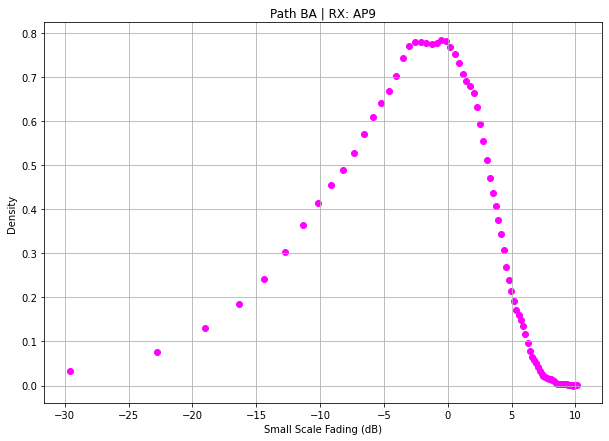

In [109]:
nAP = 'AP9'
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [110]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata)
(11244.64)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP9

Best Fitness: 11245.808110281354
Best Gen: 85
Kappa: 0.7744193733880992
Mu: 1.0084473340231253
Omega: 1.2308897529819978
Elapsed time is 47.71338725090027 seconds.


11244.64

In [111]:
fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata)
(2673.04)

Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP9

Best Fitness: 2673.1490698850894
Best Gen: 181
Kappa: 0.6924829315119435
Mu: 1.0373590657780212
Omega: 1.2291097299137952
Elapsed time is 43.341933727264404 seconds.


2673.04

In [112]:
print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata)
(11911.66)

============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP9

Best Fitness: [11907.78839597]
Best Gen: 168
Alpha: 2.584485711082698
Mu: 0.7762663126452284
R_hat: 1.1606588255073433
Elapsed time is 38.45001983642578 seconds.


11911.66

In [113]:
fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata)
(1685.55)

Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP9

Best Fitness: 76.60364380946447
Best Gen: 10
Alpha: 2.9559586881990434
Mu: 0.5198340886657661
R_hat: 1.2004262976439792
Elapsed time is 20.914254903793335 seconds.


1685.55

#### Plots

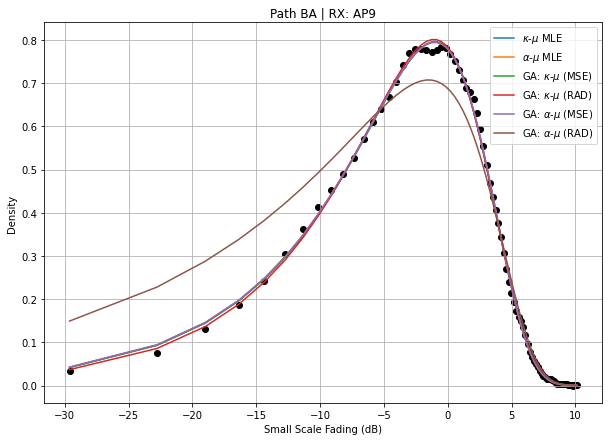

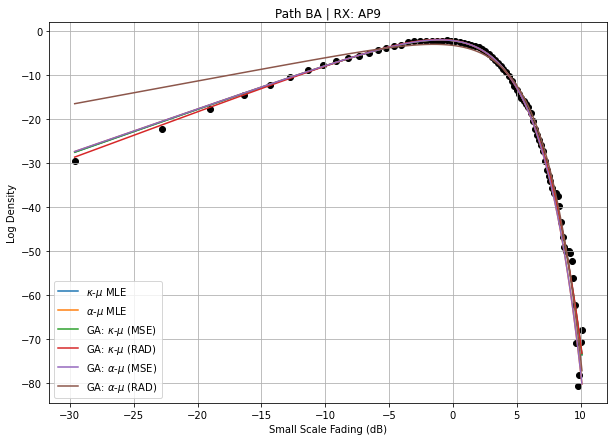

In [114]:
mle_ku_pathBA_ap9 = [0.77596, 1.0077, 1.2309] # KappaMu MLE
mle_au_pathBA_ap9 = [2.5837, 0.77709, 1.1606] # AlphaMu MLE
ku_BA_ap9_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap9[0], mle_ku_pathBA_ap9[1], mle_ku_pathBA_ap9[2]).astype(float)
au_BA_ap9_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap9[0], mle_au_pathBA_ap9[1], mle_au_pathBA_ap9[2]).astype(float)

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), Ydata, c='black')
plt.plot(20*np.log10(Xdata), ku_BA_ap9_pdf, label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), au_BA_ap9_pdf, label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=((10,7)))
plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
plt.plot(20*np.log10(Xdata), 20*np.log10(ku_BA_ap9_pdf), label=r'$\kappa$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(au_BA_ap9_pdf), label=r'$\alpha$-$\mu$ MLE')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_mse, ku_mu_mse, ku_omega_mse)), label=r'GA: $\kappa$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ku_kappa_rad, ku_mu_rad, ku_omega_rad)), label=r'GA: $\kappa$-$\mu$ (RAD)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_mse, au_mu_mse, au_r_hat_mse)), label=r'GA: $\alpha$-$\mu$ (MSE)')
plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, au_kappa_rad, au_mu_rad, au_r_hat_rad)), label=r'GA: $\alpha$-$\mu$ (RAD)')
plt.title(f'Path {path} | RX: {nAP}')
plt.legend()
plt.grid(True)
plt.xlabel(r'Small Scale Fading (dB)')
plt.ylabel('Log Density')
plt.show()

#### AIC Values

In [115]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

# AIC MLE - KAPPA MU
sum = np.sum(np.log(KappaMuPDF(data, mle_ku_pathBA_ap9[0], mle_ku_pathBA_ap9[1], mle_ku_pathBA_ap9[2]).astype(float)))
AIC_mle_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC MLE - ALPHA MU
sum = np.sum(np.log(AlphaMuPDF(data, mle_au_pathBA_ap9[0], mle_au_pathBA_ap9[1], mle_au_pathBA_ap9[2]).astype(float)))
AIC_mle_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: MSE
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_mse, ku_mu_mse, ku_omega_mse)))
AIC_ga_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM KAPPA MU - FITNESS: RAD
sum = np.sum(np.log(KappaMuPDF(data, ku_kappa_rad, ku_mu_rad, ku_omega_rad)))
AIC_ga_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: MSE
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_mse, au_mu_mse, au_r_hat_mse)))
AIC_ga_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

# AIC GENETIC ALGORITHM ALPHA MU - FITNESS: RAD
sum = np.sum(np.log(AlphaMuPDF(data, au_kappa_rad, au_mu_rad, au_r_hat_rad)))
AIC_ga_alpha_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

rads = {'Methods':['MLE - KappaMu', 'MLE - AlphaMu', \
                   'GA - KappaMu (Fitness = MSE)', 'GA - KappaMu (Fitness = RAD)',\
                   'GA - AlphaMu (Fitness = MSE)', 'GA - AlphaMu (Fitness = RAD)'],
    'Akaike Information Criteria':[AIC_mle_kappa_mu, AIC_mle_alpha_mu, AIC_ga_kappa_mu, AIC_ga_kappa_mu_rad, AIC_ga_alpha_mu , AIC_ga_alpha_mu_rad]}

# Create DataFrame
df = pd.DataFrame(rads)
display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))

,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),26020.775280
1,GA - KappaMu (Fitness = MSE),26030.756290
2,MLE - KappaMu,26031.113540
3,MLE - AlphaMu,26037.119766
4,GA - AlphaMu (Fitness = MSE),26037.499179
5,GA - AlphaMu (Fitness = RAD),26760.108465
